# Data Analysis Notebook

<font> First step is to import all of the required libraries and functions </font>

In [1]:
#import all of the required libraries

import numpy as np
import astropy
import photutils
import ccdproc
import astroalign as aa
from ccdproc import CCDData, combiner
from astropy import units as u
import astropy.io.fits as fits
from astropy.visualization import SqrtStretch
from astropy.visualization.mpl_normalize import ImageNormalize
from astropy.wcs import WCS
from astropy.coordinates import SkyCoord
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from photutils.centroids import centroid_com, centroid_1dg, centroid_2dg
from photutils.aperture import CircularAperture
from photutils.aperture import aperture_photometry
from photutils.background import Background2D
from photutils.background import MedianBackground
from photutils.detection import DAOStarFinder
from photutils.segmentation  import detect_sources, deblend_sources, SourceCatalog
from scipy.ndimage import shift
import gc       
from scipy.optimize import curve_fit

from astropy.coordinates import SkyCoord
from astroquery.gaia import Gaia

### Importing all of the relevant images
This process consists of collecting all of the .fits files, reading all images and creating lists of each file type (science, bias, dark and flat images), and finally creating lists of each type.

In [2]:
#imports all of the images

images = ccdproc.ImageFileCollection(".") #collects all images in the folder
print(dir(images))    #prints the keywords (directories) of the images
# print('\n\n')
# print(images.files)  #prints the list of names of all images loaded
      

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_all_keywords', '_dict_from_fits_header', '_ext', '_filenames', '_files', '_find_fits_by_reading', '_find_keywords_by_values', '_fits_files_in_directory', '_fits_summary', '_generator', '_get_files', '_glob_exclude', '_glob_include', '_location', '_paths', '_set_column_name_case_to_match_keywords', '_summary', 'ccds', 'data', 'ext', 'files', 'files_filtered', 'filter', 'glob_exclude', 'glob_include', 'hdus', 'headers', 'keywords', 'location', 'refresh', 'sort', 'summary', 'values']


In [3]:
# creates lists of all of the image names

sciImages_names = ( images.files_filtered(PICTTYPE = 1) ) #Creates a list of all science image names
# print(filenames1)
bias_names = ( images.files_filtered(PICTTYPE = 2) )      #creates a list of all bias image names
# print(filenames1)
dark_names = ( images.files_filtered(PICTTYPE = 3) )      #creates a list of all dark image names
# print(filenames1)
flat_names = ( images.files_filtered(PICTTYPE = 4) )      #creates a list of all flat image names
# print(filenames1)

In [4]:
#just suppresses the infinite warnings -some of them anyway-
import warnings
warnings.filterwarnings("ignore")

#reads in all of the files as lists
# Note the follwing code takes a long time to run if the notebook has been previously 
# run and all files have been created throughout
sciImages = [CCDData.read(fn, unit = "adu") for fn in images.files_filtered(PICTTYPE = 1)]  #Creates a list of science images
print('Science Images read')
biases = [CCDData.read(fn, unit = "adu") for fn in images.files_filtered(PICTTYPE = 2)]     #Creates a list of bias images
print('Bias Images read')
darks = [CCDData.read(fn, unit = "adu") for fn in images.files_filtered(PICTTYPE = 3)]      #Creates a list of dark images
print('Dark Images read')
flats = [CCDData.read(fn, unit = "adu") for fn in images.files_filtered(PICTTYPE = 4)]      #Creates a list of flat images
print('Flat Images read')

INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader inste

INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader inste

INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader inste

INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader inste

INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader inste

INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader inste

INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader inste

INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader inste

INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader inste

INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader inste

INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader inste

INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader inste

In [5]:
print('Number of flats read: ', len(flats))

Number of flats read:  160


<font> We note however that the flats taken on the 24/03/2023 were taken with poor weather conditions and were therefore not nearly as uniform as we would like in order to correctly reduce the science images. Therefore we filter out and use the flat images that were taken on the 13/03/2023 instead. </font>

In [6]:
flats = [f for f in flats if f.header['DATE-OBS'][8:10] == '13'] #creates a list of flat image names that are tagged for the 13/3/2023
print('Number of remaining Flats: ', len(flats)) #we see the number of flat images has decreased as we remove the unwanted images.

Number of remaining Flats:  80


We can now have a look at one of the science images observed on the night.

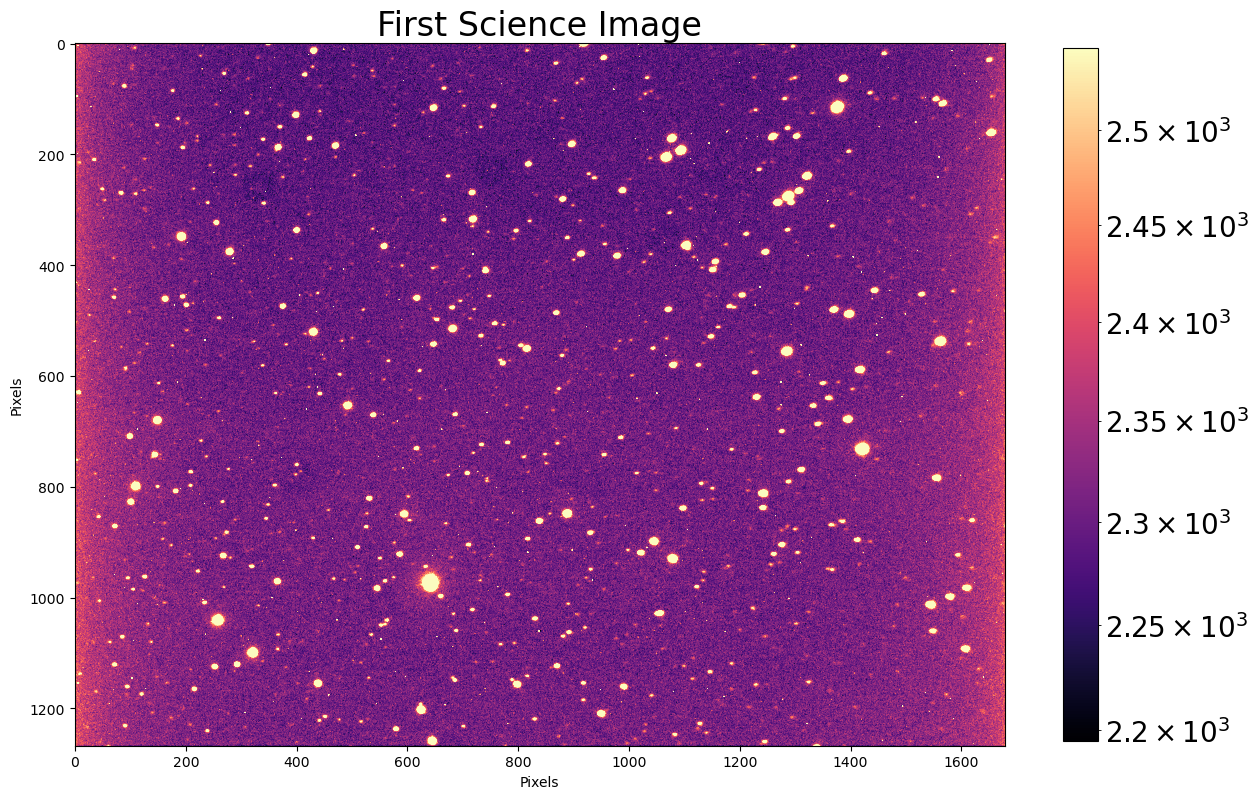

In [7]:
#prints the first science image

fig, ax = plt.subplots(figsize = (15,15)) #rescales the image
plt.rcParams.update({'font.size': 20}) #rescales the size of the text
plt.imshow(sciImages[0], cmap='magma', norm=LogNorm(vmin=np.percentile(sciImages[0],1), vmax=np.percentile(sciImages[0],99))) # prints the first science image with a useful norm and interesting colour
plt.xlabel('Pixels') # x-axis label
plt.ylabel('Pixels') # y-axis label
plt.title('First Science Image') # Image title
plt.colorbar(shrink=.6) #rescales the size of the legend

And assess some of the data from the image

In [8]:
#prints the image statistics

print('Min:', np.min(sciImages[0])) # prints the minimum pixel value from the median combined bias image
print('Max:', np.max(sciImages[0])) # prints the maximum pixel value from the median combined bias image
print('Median:', np.median(sciImages[0])) # prints the median pixel value from the median combined bias image
print('Std Dev:', np.std(sciImages[0])) # prints the standard deviation of pixel values from the median combined bias image

Min: 1530
Max: 65535
Median: 2310.0
Std Dev: 737.8569437975569


### Would you like to re-write all files when running this notebook?

In [9]:
#uncomment which option you would like
# rewrite = True       # Yes, rewrite all additional files
rewrite = False     # No, don't rewrite all additional files

## Image Processing
### Biases
We now have all of the necessary images for our data analysis. We start by reducing the images according to the image data reduction process: <br> <br> <font color=orange>
$$Recorded' = Recorded - Bias$$$$Flat' = Flat - Bias$$ 
$$Dark' = Dark - Bias$$ 
$$Recorded'' = Recorded' - A * Dark'$$ 
$$Flat'' = Flat' - B * Dark'$$
$$Final frame = Recorded'' / Flat''$$ </font>

Where A and B are arbitrary scaling factors. We begin the process by combining the Bias images so that we can subtract this from all other images. We can take a look at the first Bias image to make sure that it appears as expected.

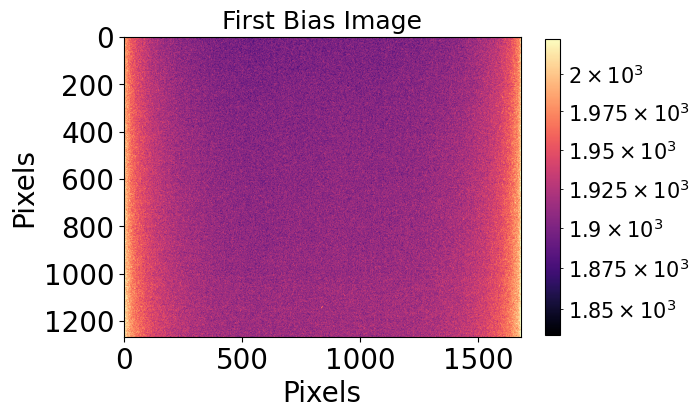

In [10]:
# prints first bias image

plt.imshow(biases[0], cmap='magma', norm=LogNorm(vmin=np.percentile(biases[0],1), vmax=np.percentile(biases[0],99))) #prints the first image
plt.rcParams.update({'font.size': 15}) # resizes font
plt.xlabel('Pixels') # x-axis label
plt.ylabel('Pixels') # y-axis label
plt.title('First Bias Image') # set title
plt.colorbar(shrink=.8) # resizes the legend

Simillarly we can have a look at some of the statistics of the image to ensure that what is shown above isn't decieving, and has the values expected.

In [11]:
#prints image statistics

print('Min:', np.min(biases[0])) # prints the minimum pixel value from the bias image
print('Max:', np.max(biases[0])) # prints the maximum pixel value from the bias image
print('Stdev:', np.std(biases[0])) # prints the standard deviation of pixel values from the bias image
print('Mean:', np.mean(biases[0])) # prints the mean pixel value from the bias image

Min: 1724
Max: 2778
Stdev: 39.473672264986064
Mean: 1919.2180968091643


We can see above that this appears as a very uniform and and pleasantly boring bias image. Visual inspection can conclude that the other bias images are also as uniform, however we can also do a quick check of the statistics of all images just to be certain.

In [12]:
# checks image statistics for all bias images

min_, max_, stdev, mean = [], [], [], [] #initialising variables
for img in biases:            #iterating through each bias image
    min_ += [np.min(img)]     #adds min value of each image
    max_ += [np.max(img)]     #adds max value of each image
    stdev += [np.std(img)]    #adds standard deviation of each image
    mean += [np.mean(img)]    #adds mean value of each image
    
print(' Mean min:', np.mean(min_), 
      '\n Mean max:', np.mean(max_), 
      '\n Mean stdv:', np.mean(stdev), 
      '\n Mean mean:', np.mean(mean))

 Mean min: 1737.38 
 Mean max: 2416.82 
 Mean stdv: 39.11050266112744 
 Mean mean: 1915.4586816642022


We can see above that these values are not very uncharacteristic, and along with a visual check can now confirm that these bias images will suffice.

We can now median combine the images to produce one bias image that best represents the CCD bias of telescope used for our imaging.

In [13]:
# median combiens all bias images and prints statistics

bias_median = ccdproc.Combiner(biases, dtype=np.float32).median_combine() #median combines all of the bias images into one bias image

print('Image statistics for the median bias') #prints some statistics for the median combined image to check if it has acted as expected
print('Min:', np.min(bias_median)) # prints the minimum pixel value from the median combined bias image
print('Max:', np.max(bias_median)) # prints the maximum pixel value from the median combined bias image
print('Median:', np.median(bias_median)) # prints the median pixel value from the median combined bias image
print('Std Dev:', np.std(bias_median)) # prints the standard deviation of pixel values from the median combined bias image

Image statistics for the median bias
Min: 1870.0
Max: 2234.5
Median: 1910.0
Std Dev: 19.639720916748047


We can see that the above statistics show a very  convincing median combine of the images. <br>
We can now add additional useful headers (directories).

In [14]:
# updates median combined bias image directories

bias_median.meta.update(EXPTIME = 0) # adds the exposure time of the median combined image
bias_median.meta.update(TELESCOP = 'C11') # adds the telescope used to image the median combined bias image
bias_median.meta.update(OBJECT = 'Bias_Median') # adds the image 'type'

We can print the new median combined bias image to see how it compares to our single bias image.

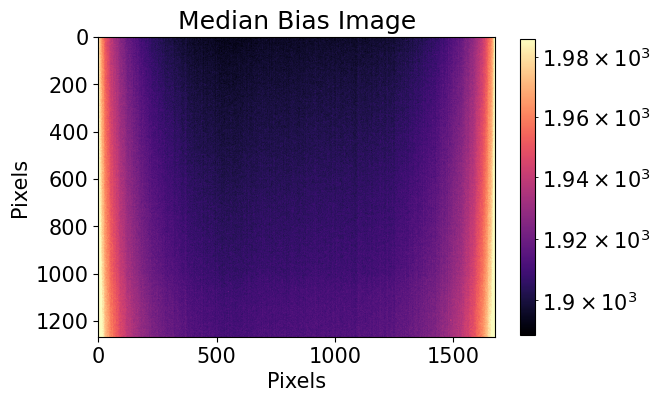

In [15]:
# prints median combined bias image

plt.imshow(bias_median, cmap='magma', norm=LogNorm(vmin=np.percentile(bias_median,1), vmax=np.percentile(bias_median,99)))
plt.rcParams.update({'font.size': 15}) # changes text size
plt.xlabel('Pixels') # x-axis label
plt.ylabel('Pixels') # y-axis label
plt.title('Median Bias Image') # image title
plt.colorbar(shrink=.8) # resizes the colorbar

Despite looking darker than the previous image, the legend on the right shows that this image is infact very similar to that shown previously.
<br><br>
We can now write a new bias_median.fits image.

In [16]:
# writes the median combined bias image as a fits file

if rewrite: #checks if the file needs to be re-written
    bias_median.write("bias_median.fits", overwrite = True) #This creates a new fits file of the combined image.
    print('file created')
else:
    print('file has already been created')

file has already been created


Now that we have combined our biases images into one useful image we can remove all of the unwanted individual biases to free up memory.

In [17]:
# removes unwanted bias info

del(biases) #removes the now irrelevent bias images
collected = gc.collect()
print('Check garbage collection', collected)

Check garbage collection 5677


### Darks
We now conduct a very simillar process to median combine our dark images into a more useful and accurate representation of the equipment used. We can print one of the dark images and some statistics of the image to see if it is characteristic of a dark image.

1919 adu
Min: 289
Max: 65535
Median: 1968.0
Std Dev: 427.0762597928206


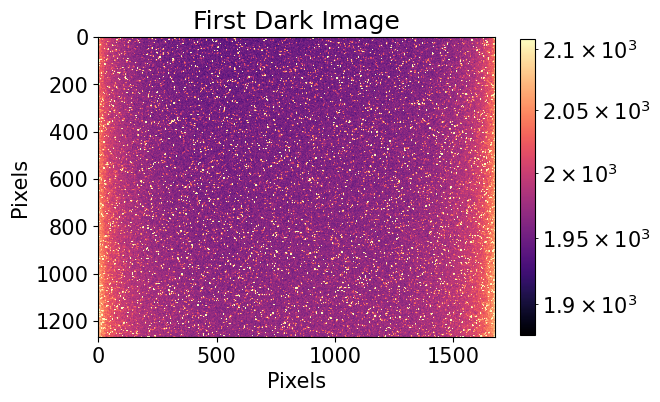

In [18]:
# prints first dar image and its statistics

plt.imshow(darks[0], cmap='magma', norm=LogNorm(vmin=np.percentile(darks[0],1), vmax=np.percentile(darks[0],99))) #This shows a preview of the first dark image.
plt.rcParams.update({'font.size': 15}) # resizes the text
plt.xlabel('Pixels') # x-axis label
plt.ylabel('Pixels') # y-axis label
plt.title('First Dark Image') # image title
plt.colorbar(shrink=.8) # resizes colour bar

print(darks[0][100][27]) #This prints a random pixel value in adu
thisimage=darks[0]       #this assigns one of the dark images the name thisimage, and the follwoing prints the min, max, stdev, and median pixel values.
print('Min:', np.min(thisimage)) # prints the minimum pixel value from the median combined bias image
print('Max:', np.max(thisimage)) # prints the maximum pixel value from the median combined bias image
print('Median:', np.median(thisimage)) # prints the median pixel value from the median combined bias image
print('Std Dev:', np.std(thisimage)) # prints the standard deviation of pixel values from the median combined bias image

We can see from the above image and statistics that this does indeed reflect a characteristic dark image. As with the biases we can conduct a quick visual and statistical check to ensure that all other dark images behave as appropriatley.

In [19]:
# prints average statistics of all dark images

min_, max_, stdev, mean = [], [], [], [] #initialising variables
for img in darks:             #iterating through each dark image
    min_ += [np.min(img)]     #adds min value of each image
    max_ += [np.max(img)]     #adds max value of each image
    stdev += [np.std(img)]    #adds standard deviation of each image
    mean += [np.mean(img)]    #adds mean value of each image
    
print(' Mean min:', np.mean(min_), 
      '\n Mean max:', np.mean(max_), 
      '\n Mean stdv:', np.mean(stdev), 
      '\n Mean mean:', np.mean(mean))

 Mean min: 267.35714285714283 
 Mean max: 65535.0 
 Mean stdv: 428.9554596467527 
 Mean mean: 1981.5242165389368


One minor thing to note is that the maximum value is 65535.0, which is the maximum number of counts, meaning that these dark images are quite saturated.
<br><br>
We can now go ahead and remove the bias from each of these dark images.

In [20]:
#removes the bias from all dark images

for idx, thisimage in enumerate(darks): #iterates through the dark images
    if 'SUBBIAS' in darks[idx].header:  #checks if the bias has already been subtracted
        pass
    else:
        darks[idx] = ccdproc.subtract_bias(thisimage, bias_median) #subtracts biases if not already completed
print('This task has been completed')

This task has been completed


We can now print one of the images and some statistics now that the biases have been removed.

-46.0 adu
Min: -1620.5
Max: 63629.0
Median: 54.5
Std Dev: 426.5200032243205


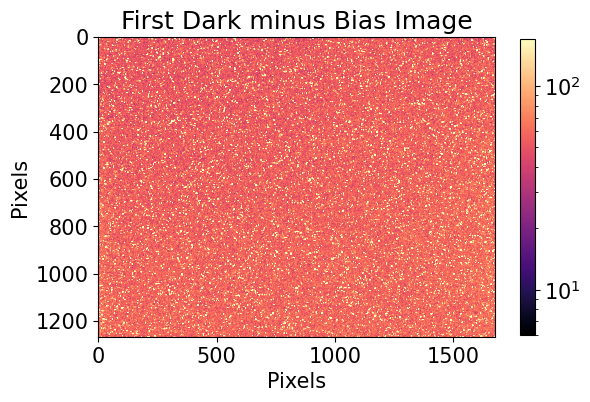

In [21]:
# prints dark image with bias removed, as well as image statistics

plt.imshow(darks[0], cmap='magma', norm=LogNorm(vmin=np.percentile(darks[0],10), vmax=np.percentile(darks[0],99)))
plt.rcParams.update({'font.size': 15}) # changes text size
plt.xlabel('Pixels') # x-axis label
plt.ylabel('Pixels') # y-axis label
plt.title('First Dark minus Bias Image') # image title
plt.colorbar(shrink=.8) # changes size of color bar

print(darks[0][100][27]) #This prints a random pixel value in adu
thisimage=darks[0] #this assigns one of the dark images the name thisimage, and the follwoing prints the min, max, stdev, and median pixel values.
print('Min:', np.min(thisimage)) # prints the minimum pixel value from the median combined bias image
print('Max:', np.max(thisimage)) # prints the maximum pixel value from the median combined bias image
print('Median:', np.median(thisimage)) # prints the median pixel value from the median combined bias image
print('Std Dev:', np.std(thisimage)) # prints the standard deviation of pixel values from the median combined bias image

The above image clearly shows how removing the bias has cleared up the darks. We can also see how the median value has dropped, and how we now have some negative counts.
<br><br>
As we are now satisfied with the dark' images we can once again median combine them to get one image that best represents the equipment used for our scientific images.

In [22]:
#median combines all bias removed dark images

dark_median = ccdproc.Combiner(darks, dtype=np.float32).median_combine() #This executes a median combine on dark images

12.0 adu
Min: -1629.5
Max: 63629.0
Median: 52.0
Std Dev: 426.3878173828125


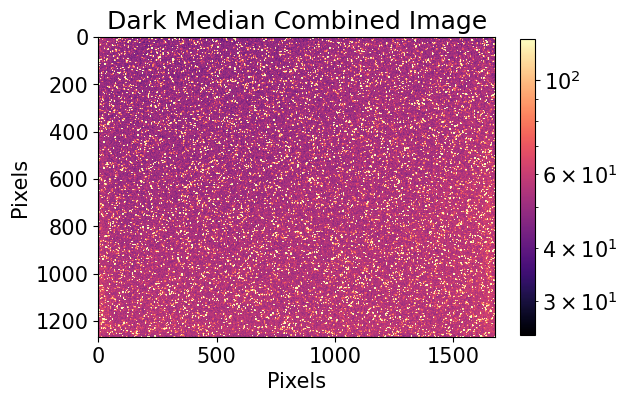

In [23]:
# prints the median combined dark image and its statistics

plt.imshow(dark_median, cmap='magma', norm=LogNorm(vmin=np.percentile(dark_median,1), vmax=np.percentile(dark_median,99))) #This shows a preview of the combined dark image.
plt.rcParams.update({'font.size': 15}) # sets text size
plt.xlabel('Pixels') # x-axis label
plt.ylabel('Pixels') # y-axis label
plt.title('Dark Median Combined Image') # image title
plt.colorbar(shrink=.8) # colorbar size

print(dark_median[100][27]) #This prints a random pixel value in adu
print('Min:', np.min(dark_median)) # prints the minimum pixel value from the median combined bias image
print('Max:', np.max(dark_median)) # prints the maximum pixel value from the median combined bias image
print('Median:', np.median(dark_median)) # prints the median pixel value from the median combined bias image
print('Std Dev:', np.std(dark_median)) # prints the standard deviation of pixel values from the median combined bias image

We can again add any useful image as directories to the image, as these will be useful in the future, and write a new dark_median.fits image.

In [24]:
# updates image directoreis and writes a new fits file for the median combined dark image

dark_median.meta.update(EXPTIME = 3600) # adds image exposure time
dark_median.meta.update(TELESCOP = 'C11') # adds telescope used
dark_median.meta.update(OBJECT = 'Dark_Median') # adds image type

if rewrite: #checks if the file needs to be re-written
    dark_median.write("dark_median.fits", overwrite = True) #This creates a new fits file of the combined image.
    print('file created')
else:
    print('file has already been created')

file has already been created


Now that we have combined our dark images into one useful image we can remove all of the unwanted individual darks to free up memory.

In [25]:
# removes unused dark data

del(darks)
collected = gc.collect()
print('Check garbage collection', collected)

Check garbage collection 29586


### Flats
We now conduct a very simillar process to median combine our flat images into a more useful and accurate representation of the equipment used. We can print one of the flat images to see if it is characteristic of a flat image.

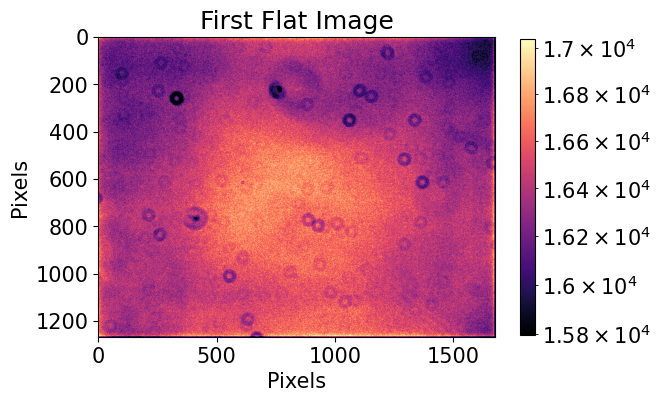

In [26]:
plt.imshow(flats[0], cmap='magma', norm=LogNorm(vmin=np.percentile(flats[0],1), vmax=np.percentile(flats[0],99))) #prints a preview of one flat image
plt.rcParams.update({'font.size': 15}) # sets texts size
plt.xlabel('Pixels') # x-axis label
plt.ylabel('Pixels') # y-axis label
plt.title('First Flat Image') # image title
plt.colorbar(shrink=.8) # sets colorbar size

We can see that the above is a fairly uniform flat field image. We can clearly see donuts formed due to dust and debri on the the lens, therefore it wouldnt necessarily be very useful to print any statistics on the flat field image yet as it would be poluted by these artifacts. We can instead go ahead and remove the bias and darks from the images.

In [27]:
# removes bias and dark from all flat field images

print('Before processing: ', flats[0][0]) # prints example pixels
for idx, thisimage in enumerate(flats): #This loops through each image and removes the bias data from them.
    if 'SUBBIAS' in flats[idx].header: # checks if bias has been removed
        pass
    else:
        flats[idx] = ccdproc.subtract_bias(thisimage, bias_median) # removes bias
print('Bias removed: ', flats[0][0]) # prints example pixels

for idx, thisimage in enumerate(flats): #This loops through each image and removes the dark data from them.
    if 'SUBDARK' in flats[idx].header: # checks if dark has been removed
        pass
    else:
        flats[idx] = ccdproc.subtract_dark(thisimage, dark_median, exposure_time = 'EXPTIME', 
                                       exposure_unit = u.second, scale = True) # removes dark
print('Dark removes: ', flats[0][0]) # prints example pixels
print('action completed')

Before processing:  [16830 17085 16632 ... 16436 15869 14944] adu
Bias removed:  [14841.5 15095.5 14629.5 ... 14450.  13851.5 12934. ] adu
Dark removes:  [14841.48138889 15095.48513889 14629.48777778 ... 14449.98916667
 13851.49097222 12933.98375   ] adu
action completed


We can now separate the flats into three lists of their respective bands as the flat field images will vary with band.

In [28]:
# creates flat field lists in each band

R_flats = [fn for fn in flats if fn.header['FILTER'] == 'R'] #creates a list of all R_band flats
B_flats = [fn for fn in flats if fn.header['FILTER'] == 'B'] #creates a list of all B_band flats
V_flats = [fn for fn in flats if fn.header['FILTER'] == 'V'] #creates a list of all V_band flats
# print(R_flats, '\n',B_flats, '\n',V_flats)

We can then again simlarly median combine the flat images into one image, starting with the band flats.

In [29]:
# median combined the R-band flat field images

tempimages = R_flats.copy() #creates a copy of the flat images so to not destroy theyre 
for idx, thisimage in enumerate(tempimages): # iterates through flat field R-band images
    m = 1.0 / np.ma.median(tempimages[idx]) 
    tempimages[idx] = tempimages[idx].multiply(m * u.adu)
FlatR_median = ccdproc.Combiner(tempimages, dtype=np.float32).median_combine() #Median combines the flat images
print('Flats combined')

Flats combined


0.9911304 adu2
Min: 0.6810403
Max: 2.8553147
Median: 1.0006210803985596
Std Dev: 0.01441117748618126


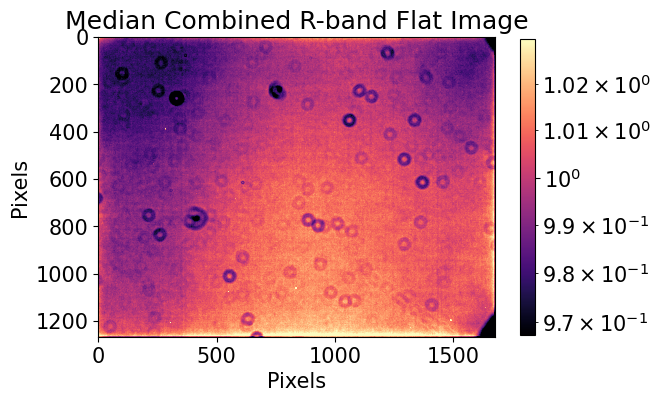

In [30]:
# prints tthe median combined Flat field image and some statistics

plt.imshow(FlatR_median, cmap='magma', norm=LogNorm(vmin=np.percentile(FlatR_median,1), vmax=np.percentile(FlatR_median,99))) #This shows a preview of the combined flat image.
plt.rcParams.update({'font.size': 15}) # sets text size
plt.xlabel('Pixels') # x-axis label
plt.ylabel('Pixels') # y-axis label
plt.title('Median Combined R-band Flat Image') # image title
plt.colorbar(shrink=.8) # colorbar size

print(FlatR_median[100][27]) #This prints a random pixel value in adu
print('Min:', np.min(FlatR_median)) # prints the minimum pixel value from the median combined bias image
print('Max:', np.max(FlatR_median)) # prints the maximum pixel value from the median combined bias image
print('Median:', np.median(FlatR_median)) # prints the median pixel value from the median combined bias image
print('Std Dev:', np.std(FlatR_median)) # prints the standard deviation of pixel values from the median combined bias image

We can repeat the above combine step for the remaining bands.

done
0.97399557 adu2
Min: 0.87535477
Max: 1.5292488
Median: 0.9995462894439697
Std Dev: 0.013204564340412617


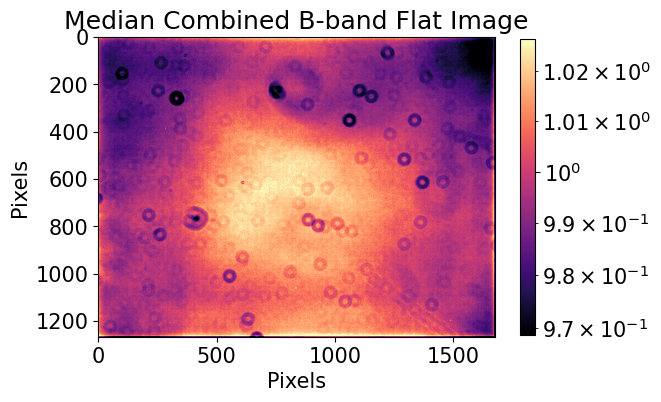

In [31]:
#combining the B-Band flats

tempimages = B_flats.copy() #creates a copy of the flat images so to not destroy theyre 
for idx, thisimage in enumerate(tempimages):
    m = 1.0 / np.ma.median(tempimages[idx])
    tempimages[idx] = tempimages[idx].multiply(m * u.adu)
FlatB_median = ccdproc.Combiner(tempimages, dtype=np.float32).median_combine() #Median combines the flat images
print('done')

#printing statistics for the B-Band flats

plt.imshow(FlatB_median, cmap='magma', norm=LogNorm(vmin=np.percentile(FlatB_median,1), vmax=np.percentile(FlatB_median,99))) #This shows a preview of the combined flat image.
plt.rcParams.update({'font.size': 15}) # sets text size
plt.xlabel('Pixels') # x-axis label
plt.ylabel('Pixels') # y-axis label
plt.title('Median Combined B-band Flat Image') # image title
plt.colorbar(shrink=.8) # colorbar size

print(FlatB_median[100][27]) #This prints a random pixel value in adu
print('Min:', np.min(FlatB_median)) # prints the minimum pixel value from the median combined bias image
print('Max:', np.max(FlatB_median)) # prints the maximum pixel value from the median combined bias image
print('Median:', np.median(FlatB_median)) # prints the median pixel value from the median combined bias image
print('Std Dev:', np.std(FlatB_median)) # prints the standard deviation of pixel values from the median combined bias image


done
0.98193324 adu2
Min: 0.8963107
Max: 2.3274038
Median: 1.0002607107162476
Std Dev: 0.01441278401762247


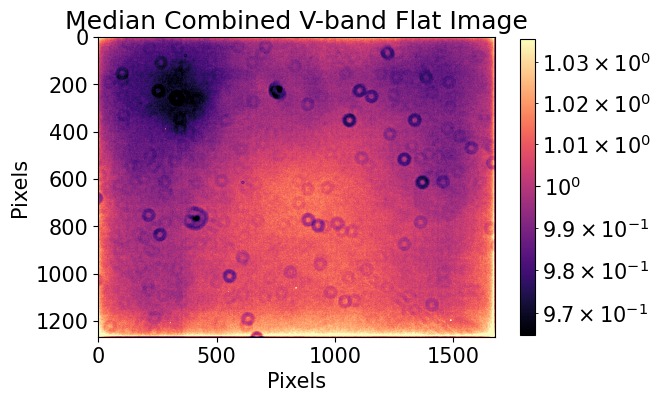

In [32]:
#combining the V-Band flats

tempimages = V_flats.copy() #creates a copy of the flat images so to not destroy theyre 
for idx, thisimage in enumerate(tempimages):
    m = 1.0 / np.ma.median(tempimages[idx])
    tempimages[idx] = tempimages[idx].multiply(m * u.adu)
FlatV_median = ccdproc.Combiner(tempimages, dtype=np.float32).median_combine() #Median combines the flat images
print('done')

#printing statistics for the V-Band flats

plt.imshow(FlatV_median, cmap='magma', norm=LogNorm(vmin=np.percentile(FlatV_median,1), vmax=np.percentile(FlatV_median,99))) #This shows a preview of the combined flat image.
plt.rcParams.update({'font.size': 15}) # sets text size
plt.xlabel('Pixels') # x-axis label
plt.ylabel('Pixels') # y-axis label
plt.title('Median Combined V-band Flat Image') # image title
plt.colorbar(shrink=.8) # colorbar size

print(FlatV_median[100][27]) #This prints a random pixel value in adu
print('Min:', np.min(FlatV_median)) # prints the minimum pixel value from the median combined bias image
print('Max:', np.max(FlatV_median)) # prints the maximum pixel value from the median combined bias image
print('Median:', np.median(FlatV_median)) # prints the median pixel value from the median combined bias image
print('Std Dev:', np.std(FlatV_median)) # prints the standard deviation of pixel values from the median combined bias image

We can update the flats with the missing directory information and then write new fit_median.fits files for each band.

In [33]:
#Updates the necessary information and writes a new median combined fits file if not already completed
FlatR_median.meta.update(EXPTIME = 1) #Adds the desired information to the image header
FlatR_median.meta.update(TELESCOP = 'C11')
FlatR_median.meta.update(OBJECT = 'Flat_R_Median')

if rewrite: #checks if the file needs to be re-written
    FlatR_median.write("flatR_median.fits", overwrite = True) #This creates a new fits file of the combined image.
    print('file created')
else:
    print('file has already been created')

#Updates the necessary information and writes a new median combined fits file if not already completed
FlatB_median.meta.update(EXPTIME = 1) #Adds the desired information to the image header
FlatB_median.meta.update(TELESCOP = 'C11')
FlatB_median.meta.update(OBJECT = 'Flat_B_Median')

if rewrite: #checks if the file needs to be re-written
    FlatB_median.write("flatB_median.fits", overwrite = True) #This creates a new fits file of the combined image.
    print('file created')
else:
    print('file has already been created')
    
#Updates the necessary information and writes a new median combined fits file if not already completed
FlatV_median.meta.update(EXPTIME = 1) #Adds the desired information to the image header
FlatV_median.meta.update(TELESCOP = 'C11')
FlatV_median.meta.update(OBJECT = 'Flat_V_Median')

if rewrite: #checks if the file needs to be re-written
    FlatV_median.write("flatV_median.fits", overwrite = True) #This creates a new fits file of the combined image.
    print('file created')
else:
    print('file has already been created')

file has already been created
file has already been created
file has already been created


Now that we have our Median combined bias, dark and flat images, we can begin the reduction process for the science images.

## Image Reduction
We again want to split the science images into three different lists based on their respective bands as we did with the flat field images.

In [34]:
# creates lists of the science images in each band

R_sci_img = [fn for fn in sciImages if fn.header['FILTER'] == 'R']  #creates a list of R-Band Science Images
B_sci_img = [fn for fn in sciImages if fn.header['FILTER'] == 'B']  #creates a list of B-Band Science Images
V_sci_img = [fn for fn in sciImages if fn.header['FILTER'] == 'V']  #creates a list of V-Band Science Images

We can now process these individually according to their band

In [35]:
# removes bias and dark, and divides flat field from all R-band science images

#removes bias
print('Example pixels: \n', R_sci_img[0][:,0])

for idx, thisimage in enumerate(R_sci_img): 
    if 'SUBBIAS' in R_sci_img[idx].header: # checks if bias has been removed
        pass
    else:
        R_sci_img[idx] = ccdproc.subtract_bias(thisimage, bias_median) #subtract the bias from each image
print('Example pixels minus bias: \n', R_sci_img[0][:,0])

#removes dark
for idx, thisimage in enumerate(R_sci_img): 
    if 'SUBDARK' in R_sci_img[idx].header: # checks if dark has been removed
        pass
    else:
        R_sci_img[idx] = ccdproc.subtract_dark(thisimage, dark_median, exposure_time = 'EXPTIME', 
                                      exposure_unit = u.second, scale = True) #subtract the dark from each image
print('Example pixels minus dark: \n', R_sci_img[0][:,0])

#divides flat field
for idx, thisimage in enumerate(R_sci_img): 
    if 'FLATCOR' in R_sci_img[idx].header:  # checks if flat has been divided
        pass
    else:
        R_sci_img[idx] = ccdproc.flat_correct(thisimage, FlatR_median) # correct each image according to the flat

print('Example pixels minus flat: \n', R_sci_img[0][:,0])
print('R-Band images reduced')

Example pixels: 
 [2743 2608 2588 ... 2665 2739 2653] adu
Example pixels minus bias: 
 [754.5 619.  593.5 ... 654.  730.  635. ] adu
Example pixels minus dark: 
 [753.94166666 618.5333333  593.13333333 ... 653.51666665 729.52916664
 634.55833331] adu
Example pixels minus flat: 
 [722.5339587  610.59450591 585.37881253 ... 621.54864945 722.95290933
 650.43852913] adu
R-Band images reduced


In [36]:
# removes bias and dark, and divides flat field from all B-band science images

#removes bias
print('Example pixels: \n', B_sci_img[0][:,0])

for idx, thisimage in enumerate(B_sci_img): 
    if 'SUBBIAS' in B_sci_img[idx].header: # checks if bias has been removed
        pass
    else:
        B_sci_img[idx] = ccdproc.subtract_bias(thisimage, bias_median) #subtract the bias from each image
print('Example pixels minus bias: \n', B_sci_img[0][:,0])

#removes dark
for idx, thisimage in enumerate(B_sci_img): 
    if 'SUBDARK' in B_sci_img[idx].header: # checks if dark has been removed
        pass
    else:
        B_sci_img[idx] = ccdproc.subtract_dark(thisimage, dark_median, exposure_time = 'EXPTIME', 
                                      exposure_unit = u.second, scale = True) #subtract the dark from each image
print('Example pixels minus dark: \n', B_sci_img[0][:,0])

#divides flat field
for idx, thisimage in enumerate(B_sci_img): 
    if 'FLATCOR' in B_sci_img[idx].header:  # checks if flat has been divided
        pass
    else:
        B_sci_img[idx] = ccdproc.flat_correct(thisimage, FlatB_median) # correct each image according to the flat
        
print('Example pixels minus flat: \n', B_sci_img[0][:,0])
print('B-Band images reduced')

Example pixels: 
 [2418 2412 2408 ... 2521 2417 2445] adu
Example pixels minus bias: 
 [429.5 423.  413.5 ... 510.  408.  427. ] adu
Example pixels minus dark: 
 [428.94166666 422.5333333  413.13333333 ... 509.51666665 407.52916664
 426.55833331] adu
Example pixels minus flat: 
 [417.33402481 414.57125593 408.63227402 ... 483.20405747 413.31166157
 457.08192407] adu
B-Band images reduced


In [37]:
# removes bias and dark, and divides flat field from all V-band science images

#removes bias
print('Example pixels: \n', V_sci_img[0][:,0])

for idx, thisimage in enumerate(V_sci_img): 
    if 'SUBBIAS' in V_sci_img[idx].header: # checks if bias has been removed
        pass
    else:
        V_sci_img[idx] = ccdproc.subtract_bias(thisimage, bias_median) #subtract the bias from each image
print('Example pixels minus bias: \n', V_sci_img[0][:,0])

#removes dark
for idx, thisimage in enumerate(V_sci_img): 
    if 'SUBDARK' in V_sci_img[idx].header: # checks if dark has been removed
        pass
    else:
        V_sci_img[idx] = ccdproc.subtract_dark(thisimage, dark_median, exposure_time = 'EXPTIME', 
                                      exposure_unit = u.second, scale = True) #subtract the dark from each image
print('Example pixels minus dark: \n', V_sci_img[0][:,0])

#divides flat field
for idx, thisimage in enumerate(V_sci_img): 
    if 'FLATCOR' in V_sci_img[idx].header:  # checks if flat has been divided
        pass
    else:
        V_sci_img[idx] = ccdproc.flat_correct(thisimage, FlatV_median) # correct each image according to the flat
        
print('Example pixels minus flat: \n', V_sci_img[0][:,0])
print('V-Band images reduced')

Example pixels: 
 [3124 3165 2999 ... 3123 2919 2944] adu
Example pixels minus bias: 
 [1135.5 1176.  1004.5 ... 1112.   910.   926. ] adu
Example pixels minus dark: 
 [1134.94166666 1175.5333333  1004.13333333 ... 1111.51666665  909.52916664
  925.55833331] adu
Example pixels minus flat: 
 [1086.26726392 1129.20806294  976.1941857  ... 1017.26017827  889.29482914
  953.09338467] adu
V-Band images reduced


Now that all of the science images have been correctly processed we can write new .fits files for each, adding the prefix 'proc' to the name to ensure that these arent confused with the unprocessed images.

In [38]:
# write processed versions of all of the science images taken

newname = [] #creates a list called newname
for fn in images.files_filtered(PICTTYPE = 1): #Iterates through each corrected image and adds them to the new list with a new name
    newname.extend(["proc_" + fn])
    
red_images = R_sci_img + B_sci_img + V_sci_img

# This writes the science images out (while including some extra lines to reduce the file size)
if rewrite: #checks if the file needs to be re-written
    for idx, thisimage in enumerate(red_images):
        tempimages = [thisimage]
        temp = ccdproc.Combiner(tempimages,dtype=np.float32).median_combine() 
        temp.meta = thisimage.meta
        temp.write(newname[idx], overwrite=True)
print('complete')

complete


We can now have another look at the science image we first observed at the start of this log, and see if any noticable changes have occured as a result of the processing.

In [39]:
#reads all of the processed images

procFits = ccdproc.ImageFileCollection(".",glob_include = 'proc*') #collects all images in the folder with useful keywords
procImages = [CCDData.read(fn, unit = "adu") for fn in procFits.files] #Creates a new list of the R-band images.

INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


In [40]:
# adds the names of each image to their directories

for idx, img in enumerate(procImages):
    img.header.append('NAME')
    img.header['NAME'] = newname[idx]

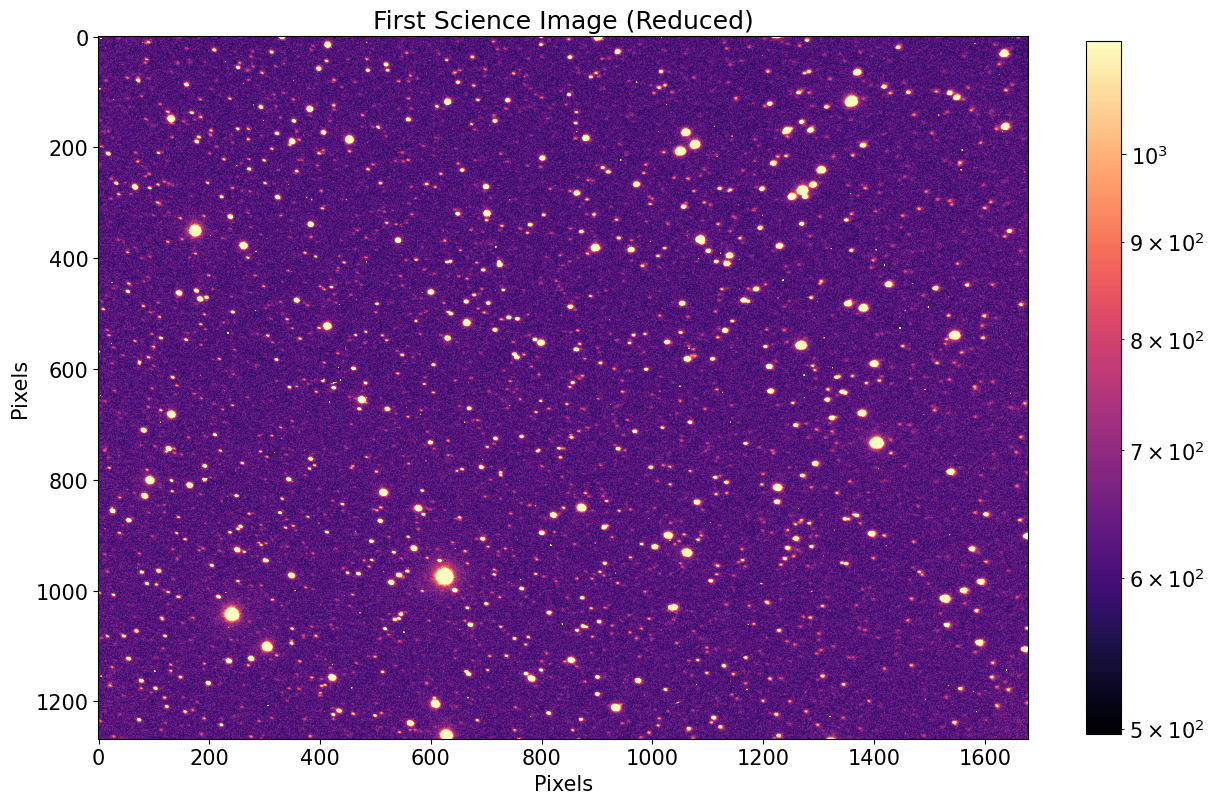

In [41]:
#prints the first science image, now processed

fig, ax = plt.subplots(figsize = (15,15)) #rescales the image
plt.rcParams.update({'font.size': 15}) #rescales the size of the text
plt.imshow(procImages[0], cmap='magma', norm=LogNorm(vmin=np.percentile(procImages[0],1), vmax=np.percentile(procImages[0],99)))
plt.xlabel('Pixels') # x-axis label
plt.ylabel('Pixels') # y-axis label
plt.title('First Science Image (Reduced)') # image title
plt.colorbar(shrink=.6) #rescales the size of the legend

Upon Visual Inspection the image appears to have been well reduced, and we can see the artifacts have been very clearly removed. There are no longer any dust rings, we can clearly see the removal of the bright edges, bright centre, and even hot pixels. We can similarly have a look at some of the image statistics to check the impact the image reduction has had.

In [42]:
# prints tha statistics for the processed image against the unprocessed image

print('Unprocessed image statistics:')
print('Min:', np.min(sciImages[0])) # prints the minimum pixel value from the median combined bias image
print('Max:', np.max(sciImages[0])) # prints the maximum pixel value from the median combined bias image
print('Median:', np.median(sciImages[0])) # prints the median pixel value from the median combined bias image
print('Std Dev:', np.std(sciImages[0])) # prints the standard deviation of pixel values from the median combined bias image
print('\n', '\n')

print('Processed image statistics:')
print('Min:', np.min(procImages[0])) # prints the minimum pixel value from the median combined bias image
print('Max:', np.max(procImages[0])) # prints the maximum pixel value from the median combined bias image
print('Median:', np.median(procImages[0])) # prints the median pixel value from the median combined bias image
print('Std Dev:', np.std(procImages[0])) # prints the standard deviation of pixel values from the median combined bias image

Unprocessed image statistics:
Min: 1530
Max: 65535
Median: 2310.0
Std Dev: 737.8569437975569

 

Processed image statistics:
Min: -102.09773
Max: 65725.664
Median: 623.5791015625
Std Dev: 1005.8143310546875


<br><br><br>
# Shifting, Scaling and Combining Images
We can now move onto the task of shifting images to a comon position, Scaling each image to a standard number of counts, and finally combining them to best reduce signal to noise.

In [43]:
# creates a list of new names for the shifted images

newname=[] #creates an empty list called newname
for fn in procFits.files: #defines the paarametres of the for loop
    newname.extend(["s"+fn]) #simply adds an s to the start of each images name


The next task is to identify a good star to shift all images to. We can identify a relatively bright and unsaturated star in the first image around x = 1100 and y = 360 that we can use as a good refernce star. The following will identify the best coordinates to use to shift by identifying the centre of star by its mass moments.

Note however that each band was taken in a different range of exposure times, this will also need to be accounted for later. We therefore collate a list of all of the exposure times.

In [44]:
# creates a list of all of the exposure times used

expTimes = [] #creates empty list
#creates a list of all of the exposure times present in the Images.
for img in procImages:
    if img.header['EXPTIME'] not in expTimes:
        expTimes += [img.header['EXPTIME']]
print('Image Exposure Times: ', expTimes)


Image Exposure Times:  [30.0, 2.0, 90.0, 3.0, 1.0]


The follwing code simply prints the index, filter, exposure time and name of each image allowing me to easily cross reference any issues in my shifting code and check which image is having issues and why.

In [45]:
# #prints the index, filter, exposure time and name of each image so i can easily reference them
# for idx, img in enumerate(procImages):
#     print(idx, img.header['FILTER'], img.header['EXPTIME'], img.header['NAME'])


Next we would like to determine how much each image needs to be shifted to line up with the reference image.

We identify the bright unsaturated star in the 90 second exposure images around the xy coordinates (414, 518).

I found the best refernce image to be image 73, as this image was very uniform and had little noise obscuring the positioning of the stars.

In [46]:
# We manually catalogue the position of the refernece star in the refernce image so every successive 
# image can be compared to this one

ref = 73 # defines the reference image
ref_shiftx = 0
ref_shifty = 0

box=30  #cretaes a box of width and height 30 pixels to find the centre of the star using centroids
xc=414-int(box/2)
yc=518-int(box/2)

temp=procImages[ref].copy() #creates a copy of the current image
temp=temp-np.ma.median(temp)

x1, y1 = centroid_com(temp[yc:yc+box,xc:xc+box]) #set x1 y1 as the centroid of the box around the point of interest
ref_shiftx = x1 + xc
ref_shifty = y1 + yc

print(' Position of reference star: ', (ref_shiftx,ref_shifty), '\n')

 Position of reference star:  (410.17542921180365, 513.8697603632418) 



We next want to check every other image, and how much they need to be shifted so that the same reference star in these images aligns with the star in the refernece image.

In [47]:
shifts=[]        # Coordinates of the amount each image needs to be shifted by.
shiftx=[]        # defines a list for the x value of the centre of the same star in every other image
shifty=[]        # defines a list for the y value of the centre of the same star in every other image

for idx, thisimage in enumerate(procImages):
    box=40
    xc=414-int(box/2)
    yc=518-int(box/2)
        
    temp=procImages[idx].copy() #creates a copy of the current image
    temp=temp-np.ma.median(temp)

    x1, y1 = centroid_com(temp[yc:yc+box,xc:xc+box]) #set x1 y1 as the centroid of the box around the point of interest
    shiftx.append(x1 + xc) # adds the x-position of the centre of the star
    shifty.append(y1 + yc ) # adds the y-position of the centre of the star
    shifts.append((np.rint(ref_shiftx-x1-xc), np.rint(ref_shifty-y1-yc))) # adds how much the image needs to be shofted in the x and y directions

print(shifts) # prints the amount each image needs to be shifted in the x and y directions.
# note how image 73 characteristically has shifts (0,0) as expected.


[(-3.0, -9.0), (-1.0, -8.0), (-2.0, -8.0), (-1.0, -8.0), (-2.0, -7.0), (-1.0, -6.0), (-2.0, -6.0), (-2.0, -6.0), (-3.0, -6.0), (-3.0, -6.0), (-3.0, -6.0), (-3.0, -6.0), (-3.0, -5.0), (-2.0, -6.0), (-3.0, -6.0), (-4.0, -1.0), (-4.0, -1.0), (-4.0, -1.0), (-4.0, -1.0), (-4.0, -1.0), (-4.0, -1.0), (-4.0, -1.0), (-4.0, -1.0), (-4.0, -1.0), (-4.0, -1.0), (-4.0, -1.0), (-4.0, -1.0), (-4.0, -1.0), (-4.0, -1.0), (-19.0, -7.0), (-19.0, -6.0), (-17.0, -6.0), (-16.0, -6.0), (-13.0, -5.0), (-5.0, -4.0), (-5.0, -5.0), (-5.0, -5.0), (-5.0, -5.0), (-5.0, -5.0), (-6.0, -5.0), (-7.0, -4.0), (-8.0, -5.0), (-9.0, -5.0), (-9.0, -5.0), (-8.0, -5.0), (-8.0, -4.0), (-7.0, -5.0), (-8.0, -3.0), (-8.0, -4.0), (-6.0, -5.0), (-6.0, -4.0), (-6.0, -4.0), (-6.0, -3.0), (-7.0, -4.0), (-7.0, 1.0), (-7.0, 1.0), (-6.0, 0.0), (-6.0, 1.0), (-6.0, 1.0), (-6.0, 1.0), (-6.0, 1.0), (-1.0, -1.0), (-2.0, -2.0), (-2.0, -2.0), (-1.0, -2.0), (-2.0, -2.0), (-1.0, -2.0), (-1.0, -2.0), (-2.0, -2.0), (-2.0, -3.0), (-2.0, -2.0), (3.0, -

We would then like to shift the images and once again cross check the new centre of each star and ensure that they have been shifted within one pixel of the centre of the refernce star in the reference image.

In [48]:
check = []     #defnies a list that can be used to the print the difference in centres after the shift

# This code is shifting every pixel in each image so that the stars are centred on the same pixel in each
for idx, thisimage in enumerate(procImages):
    
    box=30
    xc=414-int(box/2)
    yc=518-int(box/2)
       
    yxshifts=(shifts[idx][1], shifts[idx][0]) # Note the y-x convention being used here and in the following command.
    temp = shift(procImages[idx], yxshifts, order=0, mode='constant', cval=-1000) 
    temp=temp-np.ma.median(temp)
    
    # This is simply checking how close the new centroids are, and if the shift has been successful.
    x1, y1 = centroid_com(temp[yc:yc+box,xc:xc+box])
    
    check += [(round(ref_shiftx-x1-xc,1),round(ref_shifty-y1-yc,1))]

print(check)

[(0.3, 0.0), (0.2, -0.1), (-0.7, -0.1), (-0.0, 0.2), (-0.4, -0.2), (-0.6, -0.2), (-0.3, 0.6), (-0.4, -0.0), (0.1, -0.3), (-0.2, -0.2), (-0.0, -0.2), (-0.2, -0.1), (-0.2, -0.8), (-0.7, 0.5), (-0.4, 0.1), (-0.4, 0.0), (-0.4, 0.3), (-0.5, 0.1), (-0.3, -0.1), (-0.4, 0.1), (-0.4, -0.1), (-0.4, 0.1), (-0.3, 0.1), (-0.4, -0.2), (-0.5, 0.0), (-0.3, -0.0), (-0.5, -0.1), (-0.3, 0.0), (-0.3, -0.3), (-0.2, 0.1), (-0.2, -0.2), (-0.7, 0.3), (-0.4, 0.5), (-0.6, 0.4), (-0.5, -0.4), (0.0, 0.3), (0.2, -0.1), (-0.2, 0.2), (-0.4, -0.2), (-0.5, -0.2), (0.0, -0.6), (-0.0, -0.4), (0.3, -0.2), (0.2, -0.2), (-0.6, -0.3), (0.2, -1.2), (-0.5, -0.1), (0.3, -0.8), (0.3, 0.0), (-1.0, 0.1), (-0.1, -0.2), (-0.3, 0.1), (0.4, -0.7), (-0.3, -0.3), (0.2, -0.3), (0.3, -0.3), (-0.4, 0.5), (-0.5, -0.3), (-0.5, -0.4), (-0.3, -0.2), (-0.5, -0.4), (-0.4, -0.3), (0.3, -0.1), (-0.1, 0.3), (-0.6, 0.1), (0.4, 0.4), (-0.6, -0.1), (-0.6, 0.1), (0.1, -0.2), (-0.0, 0.5), (0.2, 0.0), (0.3, -0.4), (-0.3, 0.4), (0.0, 0.0), (0.2, 0.5), (0

In [49]:
print(max(check)) #checks the maximum offsets obtained after shifting

(0.5, 0.3)


Now that we are satisfied with the shifts that have been chosen we can write out new .fits files for the shifted R-Band images.

In [50]:
if rewrite: #checks if the file needs to be re-written
    for idx, thisimage in enumerate(procImages): 
        yxshifts=(shifts[idx][1], shifts[idx][0]) #defines a parameter xyshifts as a tuple of the amount the ith image was shifted in (y,x) format
        temp = CCDData(shift(procImages[idx], yxshifts, order=0, mode='constant', cval=-1000)-np.ma.median(procImages[idx]), unit="adu")
        temp.header = procImages[idx].header #sets the header of the temp function to that of the original images
        temp.write(newname[idx], overwrite=True) #writes a file with the new name defined earlier
    print('files created')
else:
    print('file has already been created')

file has already been created


# Auto Alignment
The Images could alternatively be automatically alligned, however this does introduce some more difficulties down the line. For example stars and celestial objects can be miss interpereted leading to largely inaccurate values. This also simply introduces further systematic errors that would need to be acounted for. <br>
We therefore simply stuck with manual allignment.

In [51]:
# procFits = ccdproc.ImageFileCollection(".",glob_include = 'proc*') #collects all images in the folder with useful keywords
# procImages = [CCDData.read(fn, unit = "adu") for fn in procFits.files] #Creates a new list of the processed images.

We then create a list of new names to write all of the newly shifted Fits files.

In [52]:
# newname=[] # creates a list to store the new names in
# for fn in procFits.files:  # Creates a new name for each of the images with an 'aa' at the beginning
#     newname.extend(["aa"+fn])                                                 
# # print(newname)  

We then iterate through each image, aligning it with a chosen refernce image.

In [53]:
# for idx, thisimage in enumerate(procImages):

#     # Define images to be shifted
#     # Plus zero is a quirky fix to an endian issue (old school)
#     img_ref=procImages[1].data+0       # Reference image
#     img_example=procImages[idx].data+0      # Image to be shifted image
#     print('Reference and example image defined')

#     img_aligned, footprint = aa.register(img_example, img_ref, detection_sigma=5.0, min_area=9, fill_value=-99999.99)
#     print('Image alignment determined')

#     fig, axes = plt.subplots(2, 2, figsize=(10, 10))
#     axes[0, 0].imshow(img_ref, cmap='gray', interpolation='none', origin='lower', vmin=1900, vmax=4100)
#     axes[0, 0].axis('off')
#     axes[0, 0].set_title("Source Image")

#     axes[0, 1].imshow(img_example, cmap='gray', interpolation='none', origin='lower', vmin=1900, vmax=4100)
#     axes[0, 1].axis('off')
#     axes[0, 1].set_title("Target Image")

#     axes[1, 0].imshow(img_aligned, cmap='gray', interpolation='none', origin='lower', vmin=1900, vmax=4100)
#     axes[1, 0].axis('off')
#     axes[1, 0].set_title("Source Image aligned with Target")

#     axes[1, 1].imshow(footprint, cmap='gray', interpolation='none', origin='lower')
#     axes[1, 1].axis('off')
#     axes[1, 1].set_title("Footprint of the transformation")

#     axes[1, 0].axis('off')

#     plt.tight_layout()
#     plt.show()

#     temp=procImages[idx]
#     temp.data=img_aligned
#     temp.meta = procImages[idx].meta
#     # Write the image to a file using the new name (aaproc prefix)
#     print(newname[idx])

#     if rewrite:
#         temp.write(newname[idx], overwrite = True)
#     else:
#         print('files already written')

# Scaling

Now that all of the images have been shifted we can begin scaling them to create much more uniform images. We first simply import all of the newly shifted images, separating them into their respective bands, and by long and short exposures. Long exposures consist of 30 and 90 second exposures, short exposures consitiing of 1, 2, and 3 second exposures.

In [54]:
# loads all of the shifted images

shifFits = ccdproc.ImageFileCollection(".",glob_include='sproc*') #collects all images in the folder with useful keywords
shifImages = [CCDData.read(fn, unit = "adu") for fn in shifFits.files] #Creates a new list of the shifted images.
print('Files Read')

INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader inste

INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader inste

INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader inste

INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader inste

INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader inste

INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader inste

INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader inste

INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader inste

INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader inste

INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader inste

INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]
Files Read


In [55]:
# separates the images by band and exposure length.

R_L_shif = [img for img in shifImages if img.header['FILTER'] == 'R' and img.header['EXPTIME'] == 90 or img.header['FILTER'] == 'R' and img.header['EXPTIME'] == 30] # creates a list of the shifted R-Band images
R_S_shif = [img for img in shifImages if img.header['FILTER'] == 'R' and img.header['EXPTIME'] == 2] # creates a list of the shifted R-Band images

B_L_shif = [img for img in shifImages if img.header['FILTER'] == 'B' and img.header['EXPTIME'] == 90 or img.header['FILTER'] == 'B' and img.header['EXPTIME'] == 30] # creates a list of the shifted B-Band images
B_S_shif = [img for img in shifImages if img.header['FILTER'] == 'B' and img.header['EXPTIME'] == 3] # creates a list of the shifted R-Band images

V_L_shif = [img for img in shifImages if img.header['FILTER'] == 'V' and img.header['EXPTIME'] == 90 or img.header['FILTER'] == 'V' and img.header['EXPTIME'] == 30] # creates a list of the shifted V-Band images
V_S_shif = [img for img in shifImages if img.header['FILTER'] == 'V' and img.header['EXPTIME'] == 1] # creates a list of the shifted R-Band images

print('Number of long and short R-Band exposures:', len(R_L_shif), len(R_S_shif))
print('Number of long and short B-Band exposures:', len(B_L_shif), len(B_S_shif))
print('Number of long and short V-Band exposures:', len(V_L_shif), len(V_S_shif))

Number of long and short R-Band exposures: 19 10
Number of long and short B-Band exposures: 38 10
Number of long and short V-Band exposures: 26 10


We can determine some bright unsaturated stars present in the images, noting their positions. These three stars are actually quite bright, and most importantly, unsaturated in all of the images across each band, so we can use them for every band.

In [56]:
# Create a list of positions using 3 different stars
# We seperate these according to band, as different stars may be better suited to certain bands
Rpositions = [(1540, 1010), (1570, 995), (1600, 980)]   #x-y notation
Bpositions = [(1540, 1010), (1570, 995), (1600, 980)]   #x-y notation
Vpositions = [(1540, 1010), (1570, 995), (1600, 980)]   #x-y notation

# create the appertures to be used for photometry
R_apertures = CircularAperture(Rpositions, r=20.0)
B_apertures = CircularAperture(Bpositions, r=20.0)
V_apertures = CircularAperture(Vpositions, r=20.0)

We can begin to process and check some of the data by creating tables of the photmetry of each image obtained from the apertures created above.

In [57]:
# obtains the long and short exposure photmoerty of the reference stars in every R-Band image
R_L_phot_table=[] #creates a list
for idx, thisimage in enumerate(R_L_shif): #iterates through each image in scim
    R_L_phot_table.extend([aperture_photometry(thisimage, R_apertures)]) #Adds the aperture photometry of each of the stars in each image to the list
    print(idx, R_L_phot_table[idx]) #prints the table of aperture photomerty values of each image to check if they are as expected, along with the index so we know which is which
    
R_S_phot_table=[] #creates a list
for idx, thisimage in enumerate(R_S_shif): #iterates through each image in scim
    R_S_phot_table.extend([aperture_photometry(thisimage, R_apertures)]) #Adds the aperture photometry of each of the stars in each image to the list
    print(idx, R_S_phot_table[idx]) #prints the table of aperture photomerty values of each image to check if they are as expected, along with the index so we know which is which

0  id xcenter ycenter    aperture_sum   
      pix     pix          adu        
--- ------- ------- ------------------
  1  1540.0  1010.0  652364.6522773487
  2  1570.0   995.0 244396.63953512843
  3  1600.0   980.0 247790.45588988942
1  id xcenter ycenter    aperture_sum   
      pix     pix          adu        
--- ------- ------- ------------------
  1  1540.0  1010.0  667946.5601975267
  2  1570.0   995.0 245401.20906210472
  3  1600.0   980.0 250748.07947672735
2  id xcenter ycenter    aperture_sum   
      pix     pix          adu        
--- ------- ------- ------------------
  1  1540.0  1010.0  769418.3046367565
  2  1570.0   995.0  246714.4677064147
  3  1600.0   980.0 252100.79515220586
3  id xcenter ycenter    aperture_sum   
      pix     pix          adu        
--- ------- ------- ------------------
  1  1540.0  1010.0  702252.0186240698
  2  1570.0   995.0 253994.17468417887
  3  1600.0   980.0  255177.8514215434
4  id xcenter ycenter    aperture_sum   
      pix     p

In [58]:
# obtains the long and short exposure photmoerty of the reference stars in every B-Band image
B_L_phot_table=[] #creates a list
for idx, thisimage in enumerate(B_L_shif): #iterates through each image in scim
    B_L_phot_table.extend([aperture_photometry(thisimage, B_apertures)]) #Adds the aperture photometry of each of the stars in each image to the list
    print(idx, B_L_phot_table[idx]) #prints the table of aperture photomerty values of each image to check if they are as expected, along with the index so we know which is which
    
B_S_phot_table=[] #creates a list
for idx, thisimage in enumerate(B_S_shif): #iterates through each image in scim
    B_S_phot_table.extend([aperture_photometry(thisimage, B_apertures)]) #Adds the aperture photometry of each of the stars in each image to the list
    print(idx, B_S_phot_table[idx]) #prints the table of aperture photomerty values of each image to check if they are as expected, along with the index so we know which is which

0  id xcenter ycenter    aperture_sum   
      pix     pix          adu        
--- ------- ------- ------------------
  1  1540.0  1010.0  329539.4736101962
  2  1570.0   995.0 156694.67472230058
  3  1600.0   980.0 147823.73852075537
1  id xcenter ycenter    aperture_sum   
      pix     pix          adu        
--- ------- ------- ------------------
  1  1540.0  1010.0  329824.2156413965
  2  1570.0   995.0 158234.58536701003
  3  1600.0   980.0 149989.23465126328
2  id xcenter ycenter    aperture_sum   
      pix     pix          adu        
--- ------- ------- ------------------
  1  1540.0  1010.0  367701.4274023401
  2  1570.0   995.0  156586.6400524313
  3  1600.0   980.0 151871.25299423948
3  id xcenter ycenter    aperture_sum   
      pix     pix          adu        
--- ------- ------- ------------------
  1  1540.0  1010.0  335573.8342911813
  2  1570.0   995.0 161992.80517219633
  3  1600.0   980.0 150678.05251722696
4  id xcenter ycenter    aperture_sum   
      pix     p

1  id xcenter ycenter    aperture_sum   
      pix     pix          adu        
--- ------- ------- ------------------
  1  1540.0  1010.0  33864.53308430305
  2  1570.0   995.0 20066.420659777978
  3  1600.0   980.0 14166.103814068572
2  id xcenter ycenter    aperture_sum   
      pix     pix          adu        
--- ------- ------- ------------------
  1  1540.0  1010.0 34482.185504817055
  2  1570.0   995.0  15873.61985658552
  3  1600.0   980.0 14705.947737497729
3  id xcenter ycenter    aperture_sum   
      pix     pix          adu        
--- ------- ------- ------------------
  1  1540.0  1010.0 36790.382391071784
  2  1570.0   995.0  16042.70607196438
  3  1600.0   980.0 16106.144402871294
4  id xcenter ycenter    aperture_sum   
      pix     pix          adu        
--- ------- ------- ------------------
  1  1540.0  1010.0 39414.297060118566
  2  1570.0   995.0 15682.937254315062
  3  1600.0   980.0 16022.095484835794
5  id xcenter ycenter    aperture_sum   
      pix     p

In [59]:
# obtains the long and short exposure photmoerty of the reference stars in every V-Band image
V_L_phot_table=[] #creates a list
for idx, thisimage in enumerate(V_L_shif): #iterates through each image in scim
    V_L_phot_table.extend([aperture_photometry(thisimage, V_apertures)]) #Adds the aperture photometry of each of the stars in each image to the list
    print(idx, V_L_phot_table[idx]) #prints the table of aperture photomerty values of each image to check if they are as expected, along with the index so we know which is which
    
V_S_phot_table=[] #creates a list
for idx, thisimage in enumerate(V_S_shif): #iterates through each image in scim
    V_S_phot_table.extend([aperture_photometry(thisimage, V_apertures)]) #Adds the aperture photometry of each of the stars in each image to the list
    print(idx, V_S_phot_table[idx]) #prints the table of aperture photomerty values of each image to check if they are as expected, along with the index so we know which is which

0  id xcenter ycenter    aperture_sum  
      pix     pix          adu       
--- ------- ------- -----------------
  1  1540.0  1010.0  811236.135607694
  2  1570.0   995.0 330599.9067240726
  3  1600.0   980.0 323124.0209506884
1  id xcenter ycenter    aperture_sum   
      pix     pix          adu        
--- ------- ------- ------------------
  1  1540.0  1010.0  935121.9672517414
  2  1570.0   995.0 331264.75005530514
  3  1600.0   980.0  329997.1970985611
2  id xcenter ycenter    aperture_sum   
      pix     pix          adu        
--- ------- ------- ------------------
  1  1540.0  1010.0   892826.678388171
  2  1570.0   995.0  336472.9521787658
  3  1600.0   980.0 336121.73554975743
3  id xcenter ycenter    aperture_sum   
      pix     pix          adu        
--- ------- ------- ------------------
  1  1540.0  1010.0  865006.9927332372
  2  1570.0   995.0  334393.9517323356
  3  1600.0   980.0 333744.21184018167
4  id xcenter ycenter    aperture_sum   
      pix     pix    

9  id xcenter ycenter    aperture_sum   
      pix     pix          adu        
--- ------- ------- ------------------
  1  1540.0  1010.0  33121.05760812392
  2  1570.0   995.0 11794.641155786187
  3  1600.0   980.0 11324.548114386575


We can now simply check by how much each star needs to be scaled in each of the images, as well as the median scaled value. We simply look at the R-Band as a refernce as the B and V will be quite similar, and we will conduct more extensive analysis on the validity of the scalings when the images are combined.

In [60]:
refidx = 5 #changed to account for the fact that the second image is a better reference image

for idx, thisimage in enumerate(R_L_shif): #iterates through the shifted images in scim
    print(idx) #prints the current index
    print(R_L_phot_table[refidx]['aperture_sum']/R_L_phot_table[idx]['aperture_sum']) #prints the refernece image count sum divided by the other image refernce stars for each star.
    print(np.ma.median(R_L_phot_table[refidx]['aperture_sum']/R_L_phot_table[idx]['aperture_sum'])) #prints the median value of each of the above.

0
[3.3423285  3.14120728 3.17147259]
3.1714725858279293
1
[3.26435841 3.12834849 3.13406443]
3.1340644344098636
2
[2.83385118 3.11169632 3.11724776]
3.111696324062307
3
[3.10489242 3.02251224 3.0796585 ]
3.079658495072048
4
[2.96318693 3.12400209 3.10203235]
3.1020323494944155
5
[1. 1. 1.]
1.0
6
[1.01553894 1.00468103 1.00922835]
1.0092283525600425
7
[0.98039147 1.02721048 1.01995784]
1.0199578398548668
8
[0.97550404 1.0103087  1.00318504]
1.0031850398024635
9
[0.98425272 0.99955414 1.00413781]
0.9995541371219892
10
[0.9783141  1.00167593 1.00560295]
1.0016759260516326
11
[0.99043227 0.99834432 1.00466077]
0.9983443249186019
12
[0.99931082 0.9883528  0.99894177]
0.9989417687705389
13
[0.9823293  1.0043275  1.01219364]
1.0043275045803344
14
[0.96985668 0.99798411 0.99794743]
0.9979474289233774
15
[1.01065417 1.01113837 1.00350209]
1.0106541688138926
16
[0.97474687 1.00894281 1.00576735]
1.0057673468153383
17
[0.97703547 1.0019068  1.00554674]
1.001906798413621
18
[0.98285289 1.00054155 

Or alternatively we can look at the raw data from each image and compare to the values that have been scaled.

In [61]:
for i in range(len(R_L_shif[:10])):
    print(R_L_phot_table[i]['aperture_sum'])
print('\n\n')
for idx, thisimage in enumerate(R_L_shif[:10]):
    div = R_L_phot_table[refidx]['aperture_sum']/R_L_phot_table[idx]['aperture_sum']
    m = np.ma.median(div)
    print(R_L_phot_table[idx]['aperture_sum']*m)

[652364.65227735 244396.63953513 247790.45588989] adu
[667946.56019753 245401.2090621  250748.07947673] adu
[769418.30463676 246714.46770641 252100.79515221] adu
[702252.01862407 253994.17468418 255177.85142154] adu
[735835.10617026 245742.63376335 253337.34447117] adu
[2180416.96969305  767700.50225504  785860.63788459] adu
[2147054.02367274  764123.61485807  778674.75273673] adu
[2224026.86832416  747364.35903473  770483.45252821] adu
[2235169.58394869  759867.2551111   783365.58730913] adu
[2215301.94628577  768042.94409253  782622.2978404 ] adu



[2068956.61066078  775097.24235413  785860.63788459] adu
[2093387.55840148  769103.20148272  785860.63788459] adu
[2394196.11020445  767700.50225504  784461.1175683 ] adu
[2162696.39483711  782215.31776495  785860.63788459] adu
[2282584.3032338   762301.59958388  785860.63788459] adu
[2180416.96969305  767700.50225504  785860.63788459] adu
[2166867.79516865  771175.21697544  785860.63788459] adu
[2268413.6403951   762280.13722558  785860.

We can see that the new scaled images are far more uniform. <br>
We can similarly do this for each band in the long and short exposures.

# combining

We can finally move on to the last process of combining the images. This will leave us with B, V and R band images with much higher exposures, and far gretaer signal to noise ratios.

We can now either create a mean, or meadian combined image. Both of which have their own perks, as we will see.

In [62]:
# scales all of the long and short exposure R-Band images and write new fits files for mean and median combined long
# and short exposure R-Band images

for idx, thisimage in enumerate(R_L_shif): #iterates through the shifted images
    m = np.ma.median(R_L_phot_table[refidx]['aperture_sum'] / R_L_phot_table[idx]['aperture_sum']) #sets m as the median scale value of each image as determined above
#     print(m) #prints the scaling value
    R_L_shif[idx] = R_L_shif[idx].multiply(m * u.adu) #scales the image by m
    
for idx, thisimage in enumerate(R_S_shif): #iterates through the shifted images
    m = np.ma.median(R_S_phot_table[refidx]['aperture_sum'] / R_S_phot_table[idx]['aperture_sum']) #sets m as the median scale value of each image as determined above
#     print(m) #prints the scaling value
    R_S_shif[idx] = R_S_shif[idx].multiply(m * u.adu) #scales the image by m

if rewrite:
    try:
        R_L_sci_average = ccdproc.combine(R_L_shif, method = 'average',dtype = np.float32, 
                                      minmax_clip = True, minmax_clip_min = -500) #masks all pixels that haev a value below -500. This removes the eroneous values defined before as -1000
    except:
        print('files already written')
    try:
        R_L_sci_average.write("NGC_3114_R_L_average.fits") #Writes a file for each average combined image
    except:
        print('files already written')
    try:
        R_L_sci_median = ccdproc.combine(R_L_shif, method = 'median',dtype = np.float32, 
                                     minmax_clip = True, minmax_clip_min = -500) #masks all pixels that haev a value below -500. This removes the eroneous values defined before as -1000
    except:
        print('files already written')
    try:
        R_L_sci_median.write("NGC_3114_R_L_median.fits") #Writes a file for each median combined image
    except:
        print('files already written')
else:
    print('files already written')
    
if rewrite:
    try:
        R_S_sci_average = ccdproc.combine(R_S_shif, method = 'average',dtype = np.float32, 
                                      minmax_clip = True, minmax_clip_min = -500) #masks all pixels that haev a value below -500. This removes the eroneous values defined before as -1000
    except:
        print('files already written')
    try:
        R_S_sci_average.write("NGC_3114_R_S_average.fits") #Writes a file for each average combined image
    except:
        print('files already written')
    try:
        R_S_sci_median = ccdproc.combine(R_S_shif, method = 'median',dtype = np.float32, 
                                     minmax_clip = True, minmax_clip_min = -500) #masks all pixels that haev a value below -500. This removes the eroneous values defined before as -1000
    except:
        print('files already written')
    try:
        R_S_sci_median.write("NGC_3114_R_S_median.fits") #Writes a file for each median combined image
    except:
        print('files already written')
else:
    print('files already written')

files already written
files already written


In [63]:
# scales all of the long and short exposure B-Band images and write new fits files for mean and median combined long
# and short exposure B-Band images

for idx, thisimage in enumerate(B_L_shif): #iterates through the shifted images
    m = np.ma.median(B_L_phot_table[refidx]['aperture_sum'] / B_L_phot_table[idx]['aperture_sum']) #sets m as the median scale value of each image as determined above
#     print(m) #prints the scaling value
    B_L_shif[idx] = B_L_shif[idx].multiply(m * u.adu) #scales the image by m
    
for idx, thisimage in enumerate(B_S_shif): #iterates through the shifted images
    m = np.ma.median(B_S_phot_table[refidx]['aperture_sum'] / B_S_phot_table[idx]['aperture_sum']) #sets m as the median scale value of each image as determined above
#     print(m) #prints the scaling value
    B_S_shif[idx] = B_S_shif[idx].multiply(m * u.adu) #scales the image by m
    
if rewrite:
    try:
        B_L_sci_average = ccdproc.combine(B_L_shif, method = 'average',dtype = np.float32, 
                                      minmax_clip = True, minmax_clip_min = -500) #masks all pixels that haev a value below -500. This removes the eroneous values defined before as -1000
    except:
        print('files already written')
    try:
        B_L_sci_average.write("NGC_3114_B_L_average.fits") #Writes a file for each average combined image
    except:
        print('files already written')
    try:
        B_L_sci_median = ccdproc.combine(B_L_shif, method = 'median',dtype = np.float32, 
                                     minmax_clip = True, minmax_clip_min = -500) #masks all pixels that haev a value below -500. This removes the eroneous values defined before as -1000
    except:
        print('files already written')
    try:
        B_L_sci_median.write("NGC_3114_B_L_median.fits") #Writes a file for each median combined image
    except:
        print('files already written')
else:
    print('files already written')
    
if rewrite:
    try:
        B_S_sci_average = ccdproc.combine(B_S_shif, method = 'average',dtype = np.float32, 
                                      minmax_clip = True, minmax_clip_min = -500) #masks all pixels that haev a value below -500. This removes the eroneous values defined before as -1000
    except:
        print('files already written')
    try:
        B_S_sci_average.write("NGC_3114_B_S_average.fits") #Writes a file for each average combined image
    except:
        print('files already written')
    try:
        B_S_sci_median = ccdproc.combine(B_S_shif, method = 'median',dtype = np.float32, 
                                     minmax_clip = True, minmax_clip_min = -500) #masks all pixels that haev a value below -500. This removes the eroneous values defined before as -1000
    except:
        print('files already written')
    try:
        B_S_sci_median.write("NGC_3114_B_S_median.fits") #Writes a file for each median combined image
    except:
        print('files already written')
else:
    print('files already written')

files already written
files already written


In [64]:
# scales all of the long and short exposure V-Band images and write new fits files for mean and median combined long
# and short exposure V-Band images

for idx, thisimage in enumerate(V_L_shif): #iterates through the shifted images
    m = np.ma.median(V_L_phot_table[refidx]['aperture_sum'] / V_L_phot_table[idx]['aperture_sum']) #sets m as the median scale value of each image as determined above
#     print(m) #prints the scaling value
    V_L_shif[idx] = V_L_shif[idx].multiply(m * u.adu) #scales the image by m
    
for idx, thisimage in enumerate(V_S_shif): #iterates through the shifted images
    m = np.ma.median(V_S_phot_table[refidx]['aperture_sum'] / V_S_phot_table[idx]['aperture_sum']) #sets m as the median scale value of each image as determined above
#     print(m) #prints the scaling value
    V_S_shif[idx] = V_S_shif[idx].multiply(m * u.adu) #scales the image by m
    
    
if rewrite:
    try:
        V_L_sci_average = ccdproc.combine(V_L_shif, method = 'average',dtype = np.float32, 
                                      minmax_clip = True, minmax_clip_min = -500) #masks all pixels that haev a value below -500. This removes the eroneous values defined before as -1000
    except:
        print('files already written')
    try:
        V_L_sci_average.write("NGC_3114_V_L_average.fits") #Writes a file for each average combined image
    except:
        print('files already written')
    try:
        V_L_sci_median = ccdproc.combine(V_L_shif, method = 'median',dtype = np.float32, 
                                     minmax_clip = True, minmax_clip_min = -500) #masks all pixels that haev a value below -500. This removes the eroneous values defined before as -1000
    except:
        print('files already written')
    try:
        V_L_sci_median.write("NGC_3114_V_L_median.fits") #Writes a file for each median combined image
    except:
        print('files already written')
else:
    print('files already written')
    
if rewrite:
    try:
        V_S_sci_average = ccdproc.combine(V_S_shif, method = 'average',dtype = np.float32, 
                                      minmax_clip = True, minmax_clip_min = -500) #masks all pixels that haev a value below -500. This removes the eroneous values defined before as -1000
    except:
        print('files already written')
    try:
        V_S_sci_average.write("NGC_3114_V_S_average.fits") #Writes a file for each average combined image
    except:
        print('files already written')
    try:
        V_S_sci_median = ccdproc.combine(V_S_shif, method = 'median',dtype = np.float32, 
                                     minmax_clip = True, minmax_clip_min = -500) #masks all pixels that haev a value below -500. This removes the eroneous values defined before as -1000
    except:
        print('files already written')
    try:
        V_S_sci_median.write("NGC_3114_V_S_median.fits") #Writes a file for each median combined image
    except:
        print('files already written')
else:
    print('files already written')

files already written
files already written


We can compare some of the statistics from each of the combined images to assess which will be more useful for our future analysis.

In [65]:
# print('Average combine stats')
# R_phot_table_average = aperture_photometry(R_sci_average, R_apertures)
# print('Median pixel value', np.ma.median(R_sci_average))
# print('Standard deviation', np.std(R_sci_average[300:350,50:100]))
# print(R_phot_table_average)
# print(R_phot_table[refidx]['aperture_sum']/R_phot_table_average['aperture_sum'])
# print(np.ma.median(R_phot_table[refidx]['aperture_sum']/R_phot_table_average['aperture_sum']))

# print('\n\n')
# print('Median combine stats')
# R_phot_table_median = aperture_photometry(R_sci_median, R_apertures)
# print('Median pixel value', np.ma.median(R_sci_median))
# print('Standard deviation', np.std(R_sci_median[300:350,50:100]))
# print(R_phot_table_median)
# print(R_phot_table[refidx]['aperture_sum']/R_phot_table_median['aperture_sum'])
# print(np.ma.median(R_phot_table[refidx]['aperture_sum']/R_phot_table_median['aperture_sum']))


Or alternatively we could apply a min max combine, which could be useful to correct some of the issues that may arise from using the Autoalign, or some other issues we may face.

In [66]:
# images = ccdproc.ImageFileCollection(".", glob_include = 'sproc_NGC_3766_R*') #loads the shifted images
# scim = [CCDData.read(fn) for fn in images.files_filtered()] #reads the shifted images into a list of arrays

# for idx, thisimage in enumerate(scim): #iterates through each image
#     m = np.ma.median(phot_table[refidx]['aperture_sum']/phot_table[idx]['aperture_sum']) #sets the scale factor
#     print(m) #prints the scale factor
#     scim[idx] = scim[idx].multiply(m * u.adu) #scales the image

# sci_minmax = ccdproc.combine(scim, method = 'average', dtype = np.float32, 
#                              minmax_clip = True,minmax_clip_min = -500, clip_extrema = (3,3)) #Will average combine the images masking any pixel values less than -500, as well as the 3 smallest and 3 largest pixel values.

# try:
#     sci_minmax.write("NGC_3766_R_minmax.fits") #writes a new fits file for the minmax_average combined image
# except:
#     print('files already written')

We can also simply deleted the unused shifted images to clear up space.

In [67]:
# del(shifImages) #removes the shifImages from the notebook to clear up the data were working with, and free up memory
# collected = gc.collect()
# print('Check garbage collection', collected)

# Calibrated Catalogues

We chose to use the median combined images as visual inspection showed that these had the most uniform background. The average combined images on the other hand tended to have more noise and some hot pixels. <br>
In order to create our calibrated catalogues we first need to identify all of the objects in our image. The below code searches through the combined median R-Band image -as this was the brightest and cointained the greatest number of celestial objects- and creates a segmented image of objects of atleast 9 clustered pixels (with four connected pixels) with values above 6*std.

In [68]:
# creates a segmented image of the Lomg exposyre R-Band median combined image

image = "NGC_3114_R_L_median.fits" # defines the image to be segmented
combImage = CCDData.read(image, unit = "adu") # reads the median combined R-Band image

med=np.nanmedian(combImage.data)                      # Median pixel value
combImage.data=combImage.data-med                     # Use the median for the sky subtraction
mean, median, std = astropy.stats.sigma_clipped_stats(combImage.data, sigma=3.0, maxiters=5)  # obtains the mean, 
                                                      #median and standard deviation of the image  
print('Image stats (mean, median and standard deviation):', mean,median,std)

segimage = detect_sources(combImage.data, 6*std, 9, connectivity=4, mask=None)  #determines all of the objects in the 
                    # image as a cluster of atleats nine pixels with a value greater than 2 standard deviations, with 
                    # atleast 4 connected by their edges.

INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu2 in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu2 in the FITS file. [astropy.nddata.ccddata]
Image stats (mean, median and standard deviation): -0.8840250372886658 -3.408801555633545 33.66761016845703


We can look at the segmented image and assess how the objects have been identified. This process is how we settled on a cut off of above 6 standard deviations, as this gave us the greatest identification of celestial objects with the least overlap.

Text(0.5, 1.0, 'Segmented image (6*std threshold)')

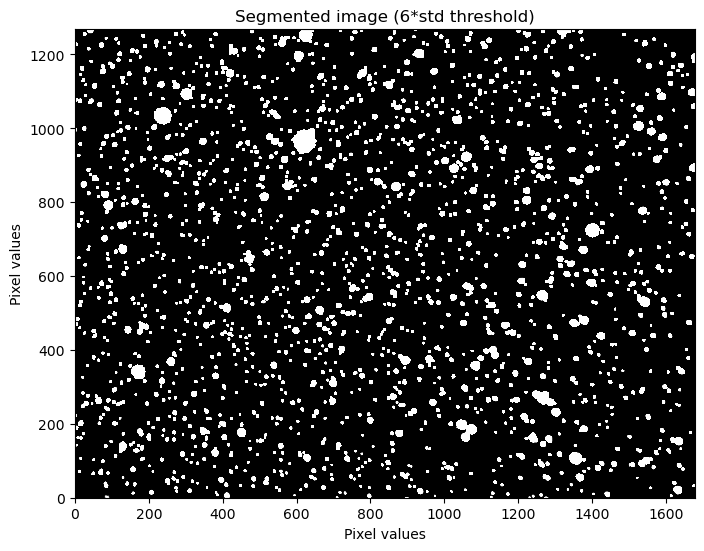

In [69]:
plt.figure(figsize=(8,8))  #sets figure size
plt.rcParams.update({'font.size': 10}) #rescales the size of the text
plt.imshow(segimage.data, cmap='gray', vmin=0, vmax=1, origin='lower')   #shows the image segmenting the identified objects
plt.xlabel('Pixel values')  #sets x axis label
plt.ylabel('Pixel values')  #sets y axis label
plt.title('Segmented image (6*std threshold)')

Once we're happy with the segmented image we can then write it into its own fits images to allow us to catalogue star positions.

In [70]:
# Creates a readable fits file for the segemented image
if rewrite:
    outfile = 'seg_' + image                # Set the output file name
    hdu=fits.PrimaryHDU(segimage)          # Define a FITS header for this data
    hdu.writeto(outfile, overwrite=True)   # Write the output and overwrite existing files if needed. 
    print(outfile, ' written')

Next we want to create our source table as a reference for the positions of all stars in each image to be used for photometry later. As all of our images have been shifted to a common position, we can therefore use this catalogue for every image.

In [71]:
source_table=SourceCatalog(combImage.data, segimage, error=None, mask=None, background=None) #converts the segmentation map in a catalogue of images
print('Source table length:\n', len(source_table))  # gives the number of objects in the catalogue
print('\n\n')
print('First entry centroid x and y values :') 
print(source_table[0].centroid[0], source_table[0].centroid[1]) # gives the x and y coordinates of the first image in the catalogue

Source table length:
 1773



First entry centroid x and y values :
86.80127564058162 2.4153176710824122


Now that we have a table containing the positions of each object we can start with the photometry. First defining a list of apertures for each objects, and then iterating through each of the combined images to get the aperture sum of each identified object.

In [72]:
positions=[]
for obj in source_table:                                   # Step through list of sources
    positions.append((obj.centroid[0], obj.centroid[1]))   # Positions for source photometry are x-y
print(positions[0:10])                                     # Print example values from the positions list.


combNames = ["NGC_3114_R_L_median.fits", "NGC_3114_R_S_median.fits", "NGC_3114_B_L_median.fits",
             "NGC_3114_B_S_median.fits", "NGC_3114_V_L_median.fits", "NGC_3114_V_S_median.fits"]
apertures = CircularAperture(positions, r=20.0) #cretaes a list of apertures of radius 20 centred on the positions of each object
phot_table = []
for img in combNames:
    phot_table.append(aperture_photometry(CCDData.read(img, unit = "adu"), apertures)) #creates a table of the aperture values
phot_table

INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu2 in the FITS file.


[(86.80127564058162, 2.4153176710824122), (411.0456078708585, 6.613034992761655), (709.4337114347746, 1.0109728644923606), (897.5706618974829, 0.31662990279218417), (1126.6681007410623, 2.25288318806922), (1230.513157246288, 1.1280528196114437), (1275.3445202295993, 0.4328550593075968), (796.0824159354264, 5.687615452413053), (1240.371041864768, 4.526835339981559), (1440.3652029324303, 10.41363975971124)]
INFO: using the unit adu passed to the FITS reader instead of the unit adu2 in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu2 in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu2 in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu2 in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu2 in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu2 in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu2 in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu2 in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu2 in the FITS file. [astropy.nddata.ccddata]


INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu2 in the FITS file.


INFO: using the unit adu passed to the FITS reader instead of the unit adu2 in the FITS file. [astropy.nddata.ccddata]


[<QTable length=1773>
   id       xcenter       ...    aperture_sum     aperture_sum_err 
              pix         ...        adu                adu        
 int64      float64       ...      float64            float64      
 ----- ------------------ ... ------------------ ------------------
     1  86.80127564058162 ...  72545.25446391752  771.9309641933049
     2  411.0456078708585 ...  871806.3528755917 4278.3109963037505
     3  709.4337114347746 ... 13230.766096972598  558.8041799725894
     4  897.5706618974829 ...  5889.454307896626   541.836260565518
     5 1126.6681007410623 ...  19129.00069634201  572.4966718344873
     6  1230.513157246288 ... 10019.722776492506  543.8125478606881
   ...                ... ...                ...                ...
  1768 1200.6615322011507 ...  47108.28096458702  553.2459311657669
  1769  774.9043286081246 ...  74513.00247432024  644.7156718502869
  1770  642.6091134486952 ... 1866619.7359020496  4588.964890434208
  1771  717.5429587845202 

By passing the long exposure R-Band image into astrometry.net we can identify a number of stars in the image. We identify a bright unsaturated star at the coordinates x: 590 and y: 850 with known magnitudes. We can obtain this object from the phot_table along with its flux in the long and short exposure R-Band images.

In [73]:
for idx, obj in enumerate(phot_table[0]): # Iterates through objects in the long expsure R-Band image
    if (obj['xcenter'].value-635)**2+(obj['ycenter'].value-110)**2<10.0**2: # checks to see if the object is our reference star
        print('Long exposure R-Band star:')
        print(obj) # prints the photometry of our reference star
        
print('\n','\n')
for idx, obj in enumerate(phot_table[1]): # Iterates through objects in the long expsure R-Band image
    if (obj['xcenter'].value-635)**2+(obj['ycenter'].value-110)**2<10.0**2: # checks to see if the object is our reference star
        print('Short exposure R-Band star:')
        print(obj) # prints the photometry of our reference star

Long exposure R-Band star:
 id      xcenter           ycenter          aperture_sum     aperture_sum_err
           pix               pix                adu                adu       
--- ----------------- ------------------ ------------------ -----------------
149 627.1787756161124 109.55878917896699 1123875.3008501714 5637.895910549367

 

Short exposure R-Band star:
 id      xcenter           ycenter          aperture_sum    aperture_sum_err
           pix               pix                adu               adu       
--- ----------------- ------------------ ------------------ ----------------
149 627.1787756161124 109.55878917896699 21509.789519908176 464.402729606587


By conducting an astrometry.net search on the image we identify this object as CD-59 2814, which has magnitudes <br>
B	11.060 <br>
V	10.920 <br>
R	10.950 <br>
We can therefore use this star to determine the magnitudes of each other star in the images according to their fluxes <br>

$$m_1 - m_2 = -2.5{\rm log_{10}} \left(\frac{f_1}{f_2} \right)$$


In [74]:
R_L_maglist=[] # defines a list for the long exposure R-Band images
for obj in phot_table[0]: # Iterates through all objects in the combined long exposure R-Band image
    R_L_maglist.append(10.950 - 2.5*np.log10(obj['aperture_sum'].value/1093193.397111013)) # determines the magnitude using the above equation
print(R_L_maglist[:20])
print('\n','\n')
R_S_maglist=[] # defines a list for the short exposure R-Band images
for obj in phot_table[1]:  # Iterates through all objects in the combined short exposure R-Band image
    R_S_maglist.append(10.950 - 2.5*np.log10(obj['aperture_sum'].value/19971.364327701005)) # determines the magnitude using the above equation
print(R_S_maglist[:20])

[13.895219978724704, 11.195692426202841, 15.742780020385991, 16.62155485785296, 15.342511792298048, 16.044603235393033, 14.765774364750719, 14.032111646517816, 16.026963523722003, 13.135233291404809, 13.335541234233206, nan, 15.042794102981603, 15.577814336654907, nan, nan, 15.689823529210315, nan, 13.589992526635237, 16.597587962627053]

 

[10.67266152790766, 11.095986015406009, nan, nan, nan, nan, nan, nan, nan, 15.648150805694394, nan, nan, nan, 17.068225461405184, nan, nan, nan, nan, 11.991094078310969, 11.651204686544785]


We conduct the same analysis of the B and V-Band images, obtaining their long and short exposure fluxes from the respective phot_tables, and using the apparent magniutudes above.

In [75]:
for idx, obj in enumerate(phot_table[2]): # Iterates through objects in the long expsure R-Band image
    if (obj['xcenter'].value-635)**2+(obj['ycenter'].value-110)**2<10.0**2: # checks to see if the object is our reference star
        print('Long exposure B-Band star:')
        print(obj) # prints the photometry of our reference star
        
print('\n','\n')
for idx, obj in enumerate(phot_table[3]): # Iterates through objects in the long expsure R-Band image
    if (obj['xcenter'].value-635)**2+(obj['ycenter'].value-110)**2<10.0**2: # checks to see if the object is our reference star
        print('Short exposure B-Band star:')
        print(obj) # prints the photometry of our reference star

Long exposure B-Band star:
 id      xcenter           ycenter          aperture_sum    aperture_sum_err
           pix               pix                adu               adu       
--- ----------------- ------------------ ----------------- -----------------
149 627.1787756161124 109.55878917896699 715545.6352674924 5508.811895687983

 

Short exposure B-Band star:
 id      xcenter           ycenter          aperture_sum     aperture_sum_err 
           pix               pix                adu                adu        
--- ----------------- ------------------ ------------------ ------------------
149 627.1787756161124 109.55878917896699 23467.030991701762 487.03148721542976


In [76]:
B_L_maglist=[] # defines a list for the long exposure B-Band images
for obj in phot_table[2]: # Iterates through all objects in the combined long exposure B-Band image
    B_L_maglist.append(11.060 - 2.5*np.log10(obj['aperture_sum'].value/727229.5915441598)) # determines the magnitude using the above equation
print(B_L_maglist[:20])
print('\n', '\n')
B_S_maglist=[] # defines a list for the short exposure B-Band images
for obj in phot_table[3]:  # Iterates through all objects in the combined short exposure B-Band image
    B_S_maglist.append(11.060 - 2.5*np.log10(obj['aperture_sum'].value/23319.960860467752)) # determines the magnitude using the above equation
print(B_S_maglist[:20])

[14.58001294281556, 11.247484861106674, nan, 16.248510449678527, nan, nan, 15.93764049852198, 14.826762928432643, nan, 13.458161710616228, 17.242218214536976, nan, 16.581978471631082, nan, nan, nan, nan, nan, 16.249066337398517, nan]

 

[13.193333749394938, 11.229725238161143, nan, nan, nan, nan, nan, nan, nan, 14.594061542360324, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


In [77]:
for idx, obj in enumerate(phot_table[4]): # Iterates through objects in the long expsure R-Band image
    if (obj['xcenter'].value-635)**2+(obj['ycenter'].value-110)**2<10.0**2: # checks to see if the object is our reference star
        print('Long exposure V-Band star:')
        print(obj) # prints the photometry of our reference star
                
print('\n','\n')
for idx, obj in enumerate(phot_table[5]): # Iterates through objects in the long expsure R-Band image
    if (obj['xcenter'].value-635)**2+(obj['ycenter'].value-110)**2<10.0**2: # checks to see if the object is our reference star
        print('Short exposure V-Band star:')
        print(obj) # prints the photometry of our reference star

Long exposure V-Band star:
 id      xcenter           ycenter          aperture_sum    aperture_sum_err
           pix               pix                adu               adu       
--- ----------------- ------------------ ------------------ ----------------
149 627.1787756161124 109.55878917896699 1502146.1088041803 9676.58103317633

 

Short exposure V-Band star:
 id      xcenter           ycenter          aperture_sum     aperture_sum_err
           pix               pix                adu                adu       
--- ----------------- ------------------ ------------------ -----------------
149 627.1787756161124 109.55878917896699 15116.316325447104 519.2710560063268


In [78]:
V_L_maglist=[] # defines a list for the long exposure V-Band images
for obj in phot_table[4]: # Iterates through all objects in the combined long exposure V-Band image
    V_L_maglist.append(10.920 - 2.5*np.log10(obj['aperture_sum'].value/1526117.8611041065)) # determines the magnitude using the above equation
print(V_L_maglist[:20])

print('\n', '\n')
V_S_maglist=[] # defines a list for the short exposure V-Band images
for obj in phot_table[5]:  # Iterates through all objects in the combined short exposure V-Band image
    V_S_maglist.append(10.920 - 2.5*np.log10(obj['aperture_sum'].value/16603.071356427645)) # determines the magnitude using the above equation
print(V_S_maglist[:20])

[15.698182392033033, 11.172649705547743, 17.470062839262518, 16.377491738325695, 18.312282706385943, 17.74215802625422, 15.178061168309402, 14.461601080768991, nan, 13.339667405536689, 15.308541725519783, nan, 15.662348918057045, 18.209452335496213, nan, nan, nan, nan, 15.094114584745054, nan]

 

[11.182627621912356, 11.172514957119484, nan, nan, nan, nan, nan, nan, nan, 14.615445704284296, nan, nan, nan, nan, nan, nan, nan, nan, 13.054500714377092, 12.382143289681053]


Now that we have our long and short exposure magnitudes in each band we can construct an HR-Diagram by plotting the apparent V-Band magnitudes against the B-V Colours.

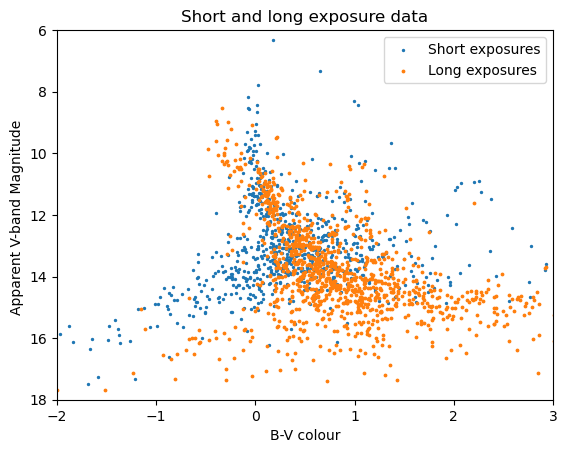

In [79]:
plt.axis([-2.0, 3, 18.0, 6.0])    # Axes ranges
plt.scatter(np.array(B_S_maglist)-np.array(V_S_maglist), np.array(V_S_maglist), s=2, label='Short exposures')    # Plots the short exposure magnitudes as a function of colour
plt.scatter(np.array(B_L_maglist)-np.array(V_L_maglist), np.array(V_L_maglist), s=3, label='Long exposures')     # Plots the long exposure magnitudes as a function of colour

# Axis labels and grid
plt.xlabel('B-V colour')          
plt.ylabel('Apparent V-band Magnitude ')
plt.title('Short and long exposure data')
plt.legend()

Noting that the long exposure data skews to produce fainter and bluer stars below 11 magnitudes we produce a merged photometry HR-Diagram.

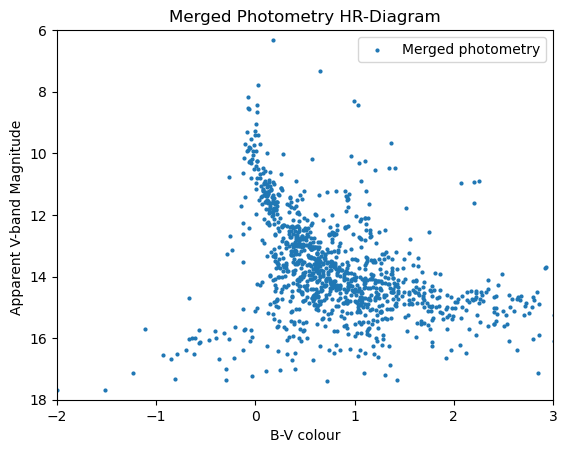

In [80]:
#Define plot size
Bmerge=[]   # Merged list of B
Vmerge=[]   # Merged list of V
BVmerge=[]  # Merged list of B-V
idx=0
# Step through the lists of photometry, producing B-V colours using one or the other
while idx<min(len(B_S_maglist),len(V_S_maglist)):
    # Use the short exposures for bright stars
    if V_S_maglist[idx]<11: # removes any short expsoure magnitudes above 9
        Bmerge.append(B_S_maglist[idx])
        Vmerge.append(V_S_maglist[idx])
        BVmerge.append(B_S_maglist[idx]-V_S_maglist[idx])
    else:
        Bmerge.append(B_L_maglist[idx])
        Vmerge.append(V_L_maglist[idx])
        BVmerge.append(B_L_maglist[idx]-V_L_maglist[idx])
    idx=idx+1


plt.axis([-2.0, 3, 18.0, 6.0]) # axes ranges
plt.scatter(BVmerge, Vmerge, s=4, label='Merged photometry') # Plots the merged long and short exposure magnitudes as a function of colour

# Axis labels and grid
plt.xlabel('B-V colour')          
plt.ylabel('Apparent V-band Magnitude ')
plt.title('Merged Photometry HR-Diagram')
plt.legend()

From the main sequence turn off occuring around B-V = 0 we determine that the star is quite young, and approximte an age in the hundreds of mega years. <br>
Given this approximation for the age of the open cluster we can get all of the required data for a catalogue of Girardi Isochrones from http://stev.oapd.inaf.it/cgi-bin/cmd. <br>
We obatin Girargdi Isochrones of 1 Myr, 100 Myr, 300 Myr, 500 Myr and 1 Gyr. <br>
When downloaded these are rather useless txt files, so we run the following code to instead open the files and process the data into useable dictionaries.

In [81]:
#develops a dictionary of all the required data of the 1 Myr Girgardi Isochrone
crons1e6 = open('1e6Isochrone.txt','r').read()  # reads the file into the notebook as crons
crons1e6 = crons1e6.replace('\n',' ').split(' ')  # splits the string into usable strings, removing all instances of \n
crons1e6 = [wrd for wrd in crons1e6[293:] if not wrd == '']  # remove all of the beginning text, and any empty strings
crons1e6 = crons1e6[:len(crons1e6)-2] # removes the end text
tags = 'Zini     MH   logAge Mini        int_IMF         Mass   logL    logTe  logg  label   McoreTP C_O  period0  period1  period2  period3  period4  pmode  Mloss  tau1m   X   Y   Xc  Xn  Xo  Cexcess  Z mbolmag  Umag    Bmag    Vmag    Rmag    Imag    Jmag    Hmag    Kmag'.split() # defines the list of parameters
crons1e6 = [[(tags[j], float(crons1e6[j+i])) for j in range(36)] for i in range(0,len(crons1e6),36)]  # creates a useable dictionary of each valye from the file with its assigned tag
crons1e6 = [dict(lst) for lst in crons1e6]

print('Isochrone Data Tags: ', tags)
print('\n''\n')

print('The U, B , V, R, I values of the first star in the 1 Myr Girardi Isochrone are')
print(crons1e6[0]['Umag'], crons1e6[0]['Bmag'], crons1e6[0]['Vmag'], crons1e6[0]['Rmag'], crons1e6[0]['Imag'])
print('\n')


#develops a dictionary of all the required data of the 50 Myr Girgardi Isochrone
crons50e6 = open('50e6Isochrone.txt','r').read()  # reads the file into the notebook as crons
crons50e6 = crons50e6.replace('\n',' ').split(' ')  # splits the string into usable strings, removing all instances of \n
crons50e6 = [wrd for wrd in crons50e6[293:] if not wrd == '']  # remove all of the beginning text, and any empty strings
crons50e6 = crons50e6[:len(crons50e6)-2] # removes the end text
tags = 'Zini     MH   logAge Mini        int_IMF         Mass   logL    logTe  logg  label   McoreTP C_O  period0  period1  period2  period3  period4  pmode  Mloss  tau1m   X   Y   Xc  Xn  Xo  Cexcess  Z mbolmag  Umag    Bmag    Vmag    Rmag    Imag    Jmag    Hmag    Kmag'.split() # defines the list of parameters
crons50e6 = [[(tags[j], float(crons50e6[j+i])) for j in range(36)] for i in range(0,len(crons50e6),36)]  # creates a useable dictionary of each valye from the file with its assigned tag
crons50e6 = [dict(lst) for lst in crons50e6]

print('Isochrone Data Tags: ', tags)
print('\n''\n')

print('The U, B , V, R, I values of the first star in the 50 Myr Girardi Isochrone are')
print(crons50e6[0]['Umag'], crons50e6[0]['Bmag'], crons50e6[0]['Vmag'], crons50e6[0]['Rmag'], crons50e6[0]['Imag'])
print('\n')


#develops a dictionary of all the required data of the 100 Myr Girgardi Isochrone
crons1e8 = open('1e8Isochrone.txt','r').read()  # reads the file into the notebook as crons
crons1e8 = crons1e8.replace('\n',' ').split(' ')  # splits the string into usable strings, removing all instances of \n
crons1e8 = [wrd for wrd in crons1e8[293:] if not wrd == '']  # remove all of the beginning text, and any empty strings
crons1e8 = crons1e8[:len(crons1e8)-2] # removes the end text
tags = 'Zini     MH   logAge Mini        int_IMF         Mass   logL    logTe  logg  label   McoreTP C_O  period0  period1  period2  period3  period4  pmode  Mloss  tau1m   X   Y   Xc  Xn  Xo  Cexcess  Z mbolmag  Umag    Bmag    Vmag    Rmag    Imag    Jmag    Hmag    Kmag'.split() # defines the list of parameters
crons1e8 = [[(tags[j], float(crons1e8[j+i])) for j in range(36)] for i in range(0,len(crons1e8),36)]  # creates a useable dictionary of each valye from the file with its assigned tag
crons1e8 = [dict(lst) for lst in crons1e8]

print('The U, B , V, R, I values of the first star in the 100 Myr Girardi Isochrone are')
print(crons1e8[0]['Umag'], crons1e8[0]['Bmag'], crons1e8[0]['Vmag'], crons1e8[0]['Rmag'], crons1e8[0]['Imag'])
print('\n')


#develops a dictionary of all the required data of the 300 Myr Girgardi Isochrone
crons3e8 = open('3e8Isochrone.txt','r').read()  # reads the file into the notebook as crons
crons3e8 = crons3e8.replace('\n',' ').split(' ')  # splits the string into usable strings, removing all instances of \n
crons3e8 = [wrd for wrd in crons3e8[293:] if not wrd == '']  # remove all of the beginning text, and any empty strings
crons3e8 = crons3e8[:len(crons3e8)-2] # removes the end text
tags = 'Zini     MH   logAge Mini        int_IMF         Mass   logL    logTe  logg  label   McoreTP C_O  period0  period1  period2  period3  period4  pmode  Mloss  tau1m   X   Y   Xc  Xn  Xo  Cexcess  Z mbolmag  Umag    Bmag    Vmag    Rmag    Imag    Jmag    Hmag    Kmag'.split() # defines the list of parameters
crons3e8 = [[(tags[j], float(crons3e8[j+i])) for j in range(36)] for i in range(0,len(crons3e8),36)]  # creates a useable dictionary of each valye from the file with its assigned tag
crons3e8 = [dict(lst) for lst in crons3e8]

print('The U, B , V, R, I values of the first star in the 300 Myr Girardi Isochrone are')
print(crons3e8[0]['Umag'], crons3e8[0]['Bmag'], crons3e8[0]['Vmag'], crons3e8[0]['Rmag'], crons3e8[0]['Imag'])
print('\n')


#develops a dictionary of all the required data of the 500 Myr Girgardi Isochrone
crons5e8 = open('5e8Isochrone.txt','r').read()  # reads the file into the notebook as crons
crons5e8 = crons5e8.replace('\n',' ').split(' ')  # splits the string into usable strings, removing all instances of \n
crons5e8 = [wrd for wrd in crons5e8[293:] if not wrd == '']  # remove all of the beginning text, and any empty strings
crons5e8 = crons5e8[:len(crons5e8)-2] # removes the end text
tags = 'Zini     MH   logAge Mini        int_IMF         Mass   logL    logTe  logg  label   McoreTP C_O  period0  period1  period2  period3  period4  pmode  Mloss  tau1m   X   Y   Xc  Xn  Xo  Cexcess  Z mbolmag  Umag    Bmag    Vmag    Rmag    Imag    Jmag    Hmag    Kmag'.split() # defines the list of parameters
crons5e8 = [[(tags[j], float(crons5e8[j+i])) for j in range(36)] for i in range(0,len(crons5e8),36)]  # creates a useable dictionary of each valye from the file with its assigned tag
crons5e8 = [dict(lst) for lst in crons5e8]

print('The U, B , V, R, I values of the first star in the 500 Myr Girardi Isochrone are')
print(crons5e8[0]['Umag'], crons5e8[0]['Bmag'], crons5e8[0]['Vmag'], crons5e8[0]['Rmag'], crons5e8[0]['Imag'])
print('\n')


#develops a dictionary of all the required data of the 1 Gyr Girgardi Isochrone
crons1e9 = open('1e9Isochrone.txt','r').read()  # reads the file into the notebook as crons
crons1e9 = crons1e9.replace('\n',' ').split(' ')  # splits the string into usable strings, removing all instances of \n
crons1e9 = [wrd for wrd in crons1e9[293:] if not wrd == '']  # remove all of the beginning text, and any empty strings
crons1e9 = crons1e9[:len(crons1e9)-2] # removes the end text
tags = 'Zini     MH   logAge Mini        int_IMF         Mass   logL    logTe  logg  label   McoreTP C_O  period0  period1  period2  period3  period4  pmode  Mloss  tau1m   X   Y   Xc  Xn  Xo  Cexcess  Z mbolmag  Umag    Bmag    Vmag    Rmag    Imag    Jmag    Hmag    Kmag'.split() # defines the list of parameters
crons1e9 = [[(tags[j], float(crons1e9[j+i])) for j in range(36)] for i in range(0,len(crons1e9),36)]  # creates a useable dictionary of each valye from the file with its assigned tag
crons1e9 = [dict(lst) for lst in crons1e9]

print('The U, B , V, R, I values of the first star in the 1 Gyr Girardi Isochrone are')
print(crons1e9[0]['Umag'], crons1e9[0]['Bmag'], crons1e9[0]['Vmag'], crons1e9[0]['Rmag'], crons1e9[0]['Imag'])


Isochrone Data Tags:  ['Zini', 'MH', 'logAge', 'Mini', 'int_IMF', 'Mass', 'logL', 'logTe', 'logg', 'label', 'McoreTP', 'C_O', 'period0', 'period1', 'period2', 'period3', 'period4', 'pmode', 'Mloss', 'tau1m', 'X', 'Y', 'Xc', 'Xn', 'Xo', 'Cexcess', 'Z', 'mbolmag', 'Umag', 'Bmag', 'Vmag', 'Rmag', 'Imag', 'Jmag', 'Hmag', 'Kmag']



The U, B , V, R, I values of the first star in the 1 Myr Girardi Isochrone are
14.086 13.075 11.729 10.124 8.225


Isochrone Data Tags:  ['Zini', 'MH', 'logAge', 'Mini', 'int_IMF', 'Mass', 'logL', 'logTe', 'logg', 'label', 'McoreTP', 'C_O', 'period0', 'period1', 'period2', 'period3', 'period4', 'pmode', 'Mloss', 'tau1m', 'X', 'Y', 'Xc', 'Xn', 'Xo', 'Cexcess', 'Z', 'mbolmag', 'Umag', 'Bmag', 'Vmag', 'Rmag', 'Imag', 'Jmag', 'Hmag', 'Kmag']



The U, B , V, R, I values of the first star in the 50 Myr Girardi Isochrone are
19.171 17.284 15.675 13.717 11.553


The U, B , V, R, I values of the first star in the 100 Myr Girardi Isochrone are
20.043 17.949 16.272 14.266

We now have a fully accessible library of U, B, V, R, I magnitudes of the Girardi ischrone for a 1 Myr, 100 Myr, 300 Myr, 500 Myr and 1 Gyr cluster. We plot each of these bellow.

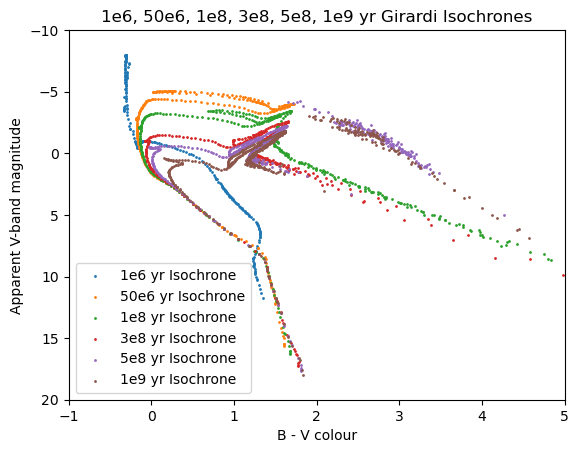

In [82]:
Vband1e6 = [star['Vmag'] for star in crons1e6]  # get the V-Band Magnitudes
BminV1e6 = [star['Bmag']-star['Vmag'] for star in crons1e6] # get the V-I colours

Vband50e6 = [star['Vmag'] for star in crons50e6]  # get the V-Band Magnitudes
BminV50e6 = [star['Bmag']-star['Vmag'] for star in crons50e6] # get the V-I colours

Vband1e8 = [star['Vmag'] for star in crons1e8]  # get the V-Band Magnitudes
BminV1e8 = [star['Bmag']-star['Vmag'] for star in crons1e8] # get the V-I colours

Vband3e8 = [star['Vmag'] for star in crons3e8]  # get the V-Band Magnitudes
BminV3e8 = [star['Bmag']-star['Vmag'] for star in crons3e8] # get the V-I colours

Vband5e8 = [star['Vmag'] for star in crons5e8]  # get the V-Band Magnitudes
BminV5e8 = [star['Bmag']-star['Vmag'] for star in crons5e8] # get the V-I colours

Vband1e9 = [star['Vmag'] for star in crons1e9]  # get the V-Band Magnitudes
BminV1e9 = [star['Bmag']-star['Vmag'] for star in crons1e9] # get the V-I colours


plt.scatter(BminV1e6, Vband1e6, s=1, label='1e6 yr Isochrone') # plots 1e6 yr Isochrone
plt.scatter(BminV50e6, Vband50e6, s=1, label='50e6 yr Isochrone') # plots 50e6 yr Isochrone
plt.scatter(BminV1e8, Vband1e8, s=1, label='1e8 yr Isochrone') # plots 1e8 yr Isochrone
plt.scatter(BminV3e8, Vband3e8, s=1, label='3e8 yr Isochrone') # plots 3e8 yr Isochrone
plt.scatter(BminV5e8, Vband5e8, s=1, label='5e8 yr Isochrone') # plots 5e8 yr Isochrone
plt.scatter(BminV1e9, Vband1e9, s=1, label='1e9 yr Isochrone') # plots 1e9 yr Isochrone

plt.axis([-1.0, 5, 20.0, -10.0]) 
plt.title('1e6, 50e6, 1e8, 3e8, 5e8, 1e9 yr Girardi Isochrones') # label the graph
plt.xlabel('B - V colour') # label the x axis
plt.ylabel('Apparent V-band magnitude') # label the y axis
plt.legend()
plt.show()

The above is helpful as we can clearly see the main sequence turn off in each isochrone, reasuringly all of which occur around B-V=0. <br>
However, as a somewhat more insightful use of the Isochrones, we can plot it along side our HR-Diagram to observe the difference in main sequence magnitudes.

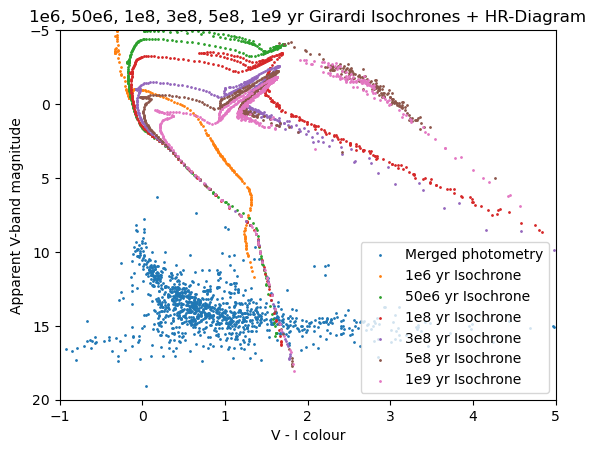

In [83]:
plt.axis([-1.0, 5, 20.0, -5.0])  # Axes ranges

plt.scatter(BVmerge, Vmerge, s=1, label='Merged photometry') # plots the merged photometry data

plt.scatter(BminV1e6, Vband1e6, s=1, label='1e6 yr Isochrone') # plots 1e6 yr Isochrone
plt.scatter(BminV50e6, Vband50e6, s=1, label='50e6 yr Isochrone') # plots 50e6 yr Isochrone
plt.scatter(BminV1e8, Vband1e8, s=1, label='1e8 yr Isochrone') # plots 1e8 yr Isochrone
plt.scatter(BminV3e8, Vband3e8, s=1, label='3e8 yr Isochrone') # plots 3e8 yr Isochrone
plt.scatter(BminV5e8, Vband5e8, s=1, label='5e8 yr Isochrone') # plots 5e8 yr Isochrone
plt.scatter(BminV1e9, Vband1e9, s=1, label='1e9 yr Isochrone') # plots 1e9 yr Isochrone

plt.legend()
plt.title('1e6, 50e6, 1e8, 3e8, 5e8, 1e9 yr Girardi Isochrones + HR-Diagram') # label the graph
plt.xlabel('V - I colour') # label the x axis
plt.ylabel('Apparent V-band magnitude') # label the y axis
plt.legend()


We note that the differnce between main sequence on our HR-Diagram and the Isochrones is roughly 10 magnitudes. We can alter the positioning of the Isochrones below to observe how well this lines up now.

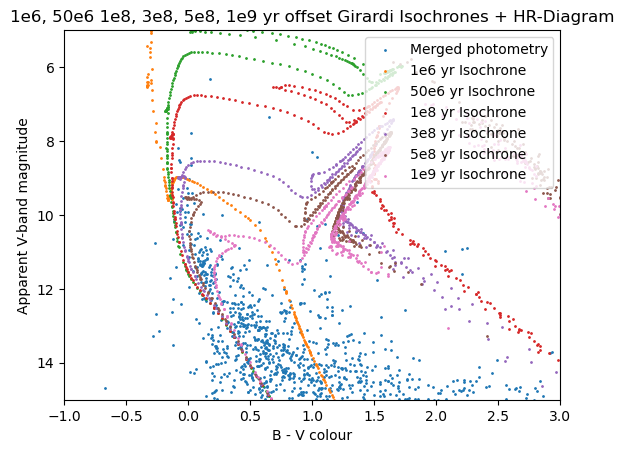

In [84]:
Vband1e6 = [star['Vmag']+10 for star in crons1e6]  # offsets the 1e6 yr Isochrone by +10 magnitudes
Vband50e6 = [star['Vmag']+10 for star in crons50e6]  # offsets the 50e6 yr Isochrone by +10 magnitudes
Vband1e8 = [star['Vmag']+10 for star in crons1e8]  # offsets the 1e8 yr Isochrone by +10 magnitudes
Vband3e8 = [star['Vmag']+10 for star in crons3e8]  # offsets the 3e8 yr Isochrone by +10 magnitudes
Vband5e8 = [star['Vmag']+10 for star in crons5e8]  # offsets the 5e8 yr Isochrone by +10 magnitudes
Vband1e9 = [star['Vmag']+10 for star in crons1e9]  # offsets the 1e9 yr Isochrone by +10 magnitudes

plt.axis([-1.0, 3, 15.0, 5.0])  # Axes ranges

plt.scatter(BVmerge, Vmerge, s=1, label='Merged photometry') # plots the merged photometry data

plt.scatter(BminV1e6, Vband1e6, s=1, label='1e6 yr Isochrone') # plots 1e6 yr Isochrone
plt.scatter(BminV50e6, Vband50e6, s=1, label='50e6 yr Isochrone') # plots 50e6 yr Isochrone
plt.scatter(BminV1e8, Vband1e8, s=1, label='1e8 yr Isochrone') # plots 1e8 yr Isochrone
plt.scatter(BminV3e8, Vband3e8, s=1, label='3e8 yr Isochrone') # plots 3e8 yr Isochrone
plt.scatter(BminV5e8, Vband5e8, s=1, label='5e8 yr Isochrone') # plots 5e8 yr Isochrone
plt.scatter(BminV1e9, Vband1e9, s=1, label='1e9 yr Isochrone') # plots 1e9 yr Isochrone

plt.title('1e6, 50e6 1e8, 3e8, 5e8, 1e9 yr offset Girardi Isochrones + HR-Diagram') # label the graph
plt.xlabel('B - V colour') # label the x axis
plt.ylabel('Apparent V-band magnitude') # label the y axis
plt.legend(loc=1)


We have zoomed in on the main sequence turn off in the graph above, and we can clearly see that the 1e8, 3e8 and 5e8 yr Isochrone give the best representation of the turn off. However, they still dont line up particularly well. We recall the impact of interstellar dust on observational data, which is going to cause the reddening, and dimming of our observed photometry. <br>
We find a literature visual dust extinction of E(B-V)=0.03 according to Star clusters in the Carina complex: UBVRI photometry of NGC 3114, Collinder 228 and vdB-Hagen 99 report.

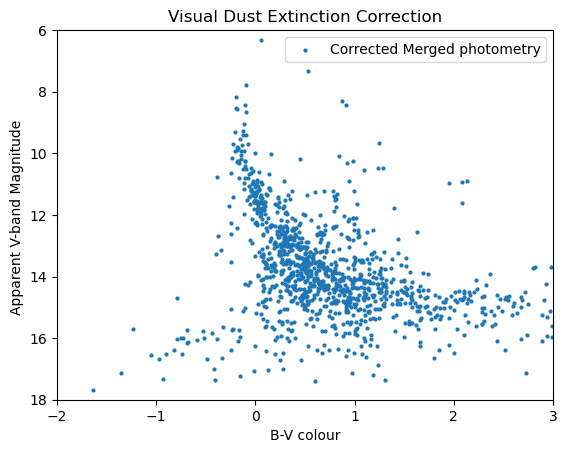

In [85]:
DBVmerge = [BVmerge[i]-0.12 for i in range(len(BVmerge))]

plt.axis([-2.0, 3, 18.0, 6.0])  # Axes ranges
plt.scatter(DBVmerge, Vmerge, s=4, label='Corrected Merged photometry') # corrected merged photometry data

# Axis labels and grid
plt.xlabel('B-V colour')          
plt.ylabel('Apparent V-band Magnitude ')
plt.title('Visual Dust Extinction Correction')
plt.legend()

We then once again plot the +10 offset 1e8, 3e8 and 5e8 yr Isochrones over the top of the merged photometry with the new dust extinction offset, and find that the 1e8 yr Isochrones gives the best approximation of the data.

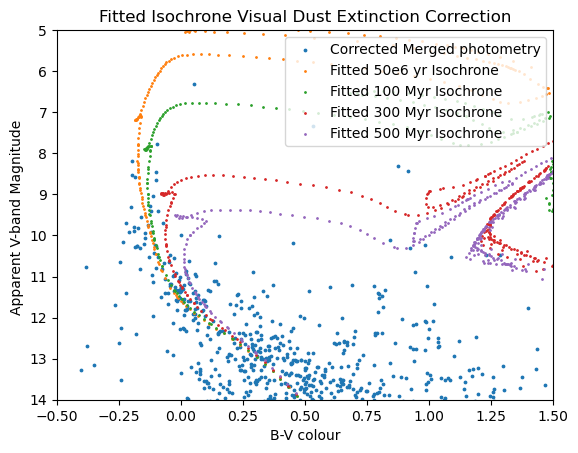

In [87]:
plt.axis([-0.5, 1.5, 14.0, 5.0])  # Axes ranges

plt.scatter(DBVmerge, Vmerge, s=3, label='Corrected Merged photometry') # corrected merged photometry data

plt.scatter(BminV50e6, Vband50e6, s=1, label='Fitted 50e6 yr Isochrone') # plots 50e6 yr Isochrone
plt.scatter(BminV1e8, Vband1e8, s=1, label='Fitted 100 Myr Isochrone') # plots 1e8 yr Isochrone
plt.scatter(BminV3e8, Vband3e8, s=1, label='Fitted 300 Myr Isochrone') # plots 3e8 yr Isochrone
plt.scatter(BminV5e8, Vband5e8, s=1, label='Fitted 500 Myr Isochrone') # plots 5e8 yr Isochrone

plt.rcParams.update({'font.size': 10}) #rescales the size of the text
plt.xlabel('B-V colour')          
plt.ylabel('Apparent V-band Magnitude ')
plt.title('Fitted Isochrone Visual Dust Extinction Correction')
plt.legend(loc=1)

We determine that the 100 Myr Girardi Isochrone provides the best approximate for the main sequence and main sequence turn off. We therefore plot the 100 Myr Isochrone, and via trial and error find that the best error is $\pm$ 0.4 magnitudes.

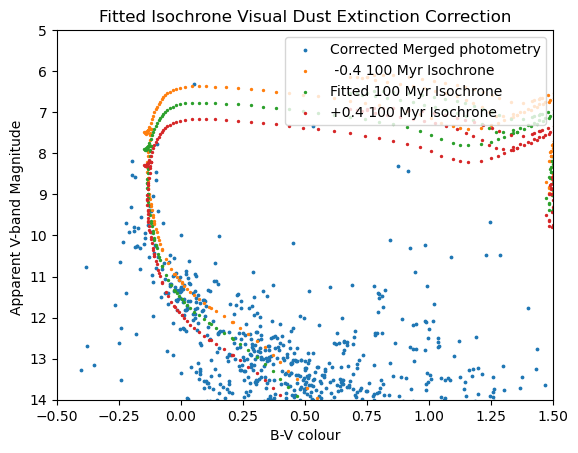

In [96]:
plt.axis([-0.5, 1.5, 14.0, 5.0])  # Axes ranges

plt.scatter(DBVmerge, Vmerge, s=3, label='Corrected Merged photometry') # corrected merged photometry data

plt.scatter(BminV1e8, [star['Vmag']+9.6 for star in crons1e8], s=2, label=' -0.4 100 Myr Isochrone') # plots 1e8 yr Isochrone
plt.scatter(BminV1e8, [star['Vmag']+10 for star in crons1e8], s=2, label='Fitted 100 Myr Isochrone') # plots 1e8 yr Isochrone
plt.scatter(BminV1e8, [star['Vmag']+10.4 for star in crons1e8], s=2, label='+0.4 100 Myr Isochrone') # plots 1e8 yr Isochrone


plt.rcParams.update({'font.size': 10}) #rescales the size of the text
plt.xlabel('B-V colour')          
plt.ylabel('Apparent V-band Magnitude ')
plt.title('Fitted Isochrone Visual Dust Extinction Correction')
plt.legend(loc=1)

We therefore obtain a final estimate for the age of the cluster of roughly 100 Myr, and from the Isochrone offset we find m-M = 10 $\pm$ 0.4, which using the distance modulus gives us an approximate distance to the cluster of:

In [ ]:
# prints the distance to the cluster
print('The distance to the cluster is: ', 10*10**(10/5), 'parsec', '\u00B1', np.rint(10*10**(0.4/5)))

which is very close to the literature value of 940 $\pm$ 60 parsec.

Using this approximate distance to the cluster we can determine the absolute magnitudes off each of the identified celestial objects according to the distance modulus:
$$M = m - 5{\rm log_{10}} \left(\frac{d}{10 parsec} \right)$$

In [89]:
# calculates the absolute magnitudes using the distance modulus as above
AbsMag = [Vmerge[i] - 5*np.log10(1000/10) for i in range(len(Vmerge))]
print(AbsMag)

[5.698182392033033, 1.1726497055477427, 7.470062839262518, 6.377491738325695, 8.312282706385943, 7.74215802625422, 5.1780611683094016, 4.461601080768991, nan, 3.339667405536689, 5.308541725519783, nan, 5.662348918057045, 8.209452335496213, nan, nan, nan, nan, 5.0941145847450535, nan, nan, 2.1238954465619173, 1.7613106013005702, 7.758717299723777, nan, 5.4884813265527015, 3.044185973790279, nan, nan, nan, 6.491238132610391, 6.089346951342666, nan, nan, nan, 3.549776335356537, 5.969295071156868, nan, nan, 7.147178558616844, nan, nan, 2.4317501998915088, 0.9068267895630857, 5.2540884256497975, nan, 5.622398553528898, nan, 3.177017480605228, nan, nan, nan, nan, nan, nan, 3.60839986530889, 3.2475922440325995, 2.5651072358496947, nan, nan, 4.986216097882494, nan, 2.5239557003617, 4.559443221588214, 0.9909942755547956, 5.992429440006809, 4.44873811400851, 3.598190440075461, 4.3926334624134356, 5.976414854624281, 3.864954360722759, 3.457059259087959, 5.433167937239009, nan, 3.417617724654555, 

We now want to find the Initial mass function describing the distribution of star masses within the cluster.
We first plot the number of stars as a function of absolute magnitude.

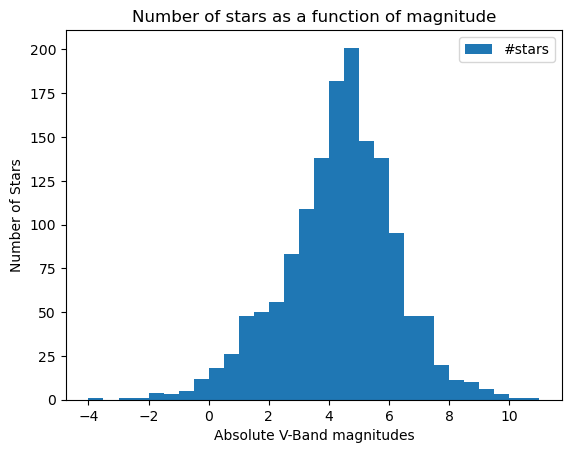

In [90]:
buckets = [np.rint(min(AbsMag)) + 0.5*i for i in range(2*(int(np.rint(max(AbsMag))) - int(np.rint(min(AbsMag))))+1)]
plt.hist(AbsMag, buckets, label='#stars') # Plots a histogram of the magnitudes
# Axis labels and grid
plt.rcParams.update({'font.size': 10}) #rescales the size of the text
plt.xlabel('Absolute V-Band magnitudes')          
plt.ylabel('Number of Stars')
plt.title('Number of stars as a function of magnitude')
plt.legend()

If we assume that all of our stars are similar in size and shape, we can estimate that luminosity is proportional to the star's surface area and temperature, which in turn is related to its mass. Specifically, the luminosity of a star is proportional to its mass raised to the third or fourth power. <br>
Assuming that Luminosity is proportional to the mass of a star raised to the fourth power we find: <br><br>
$$ {L \over Lsun} = { M \over Msun }^4 $$ <br>
Then, given the Sun has an absolute magnitude of 4.83 and a mass of 1 solar mass, and that for every 5 units of absolute magnitude the luminosity of a star changes by a factor of 100, we solve for the mass of a star with absolute visual magnitude V to find: <br> <br>
$$ {M\over Msun} = {100}^{{4.83 - V}\over{20}}$$ <br>
Where V is the V-Band absolute magnitudes determined above.<br>
After determining the mass of all of the celestial objects we can plot the number of stars as a function of mass/solar mass.

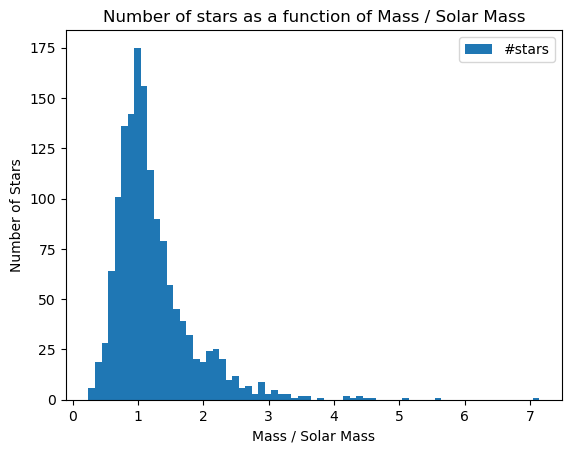

In [91]:
mass = [100**((4.83-V)/20) for V in AbsMag ] # calculates the Mass/Mass(sun) according to the equation above for each V mag

i = min(mass)
buckets = [i]
while i < max(mass): #creates the necesarry buckets to plot number of stars as a function of mass.
    i += 0.1
    buckets.append(i)

plt.hist(mass, buckets, label='#stars') # Plots a histogram of the magnitudes
plt.xlabel('Mass / Solar Mass')        # x-axis label            
plt.ylabel('Number of Stars')          # y-axis label  
plt.title('Number of stars as a function of Mass / Solar Mass') # Image title
plt.legend()

We can now plot the log of the number of stars as a function of the log of the mass given the number of stars above.

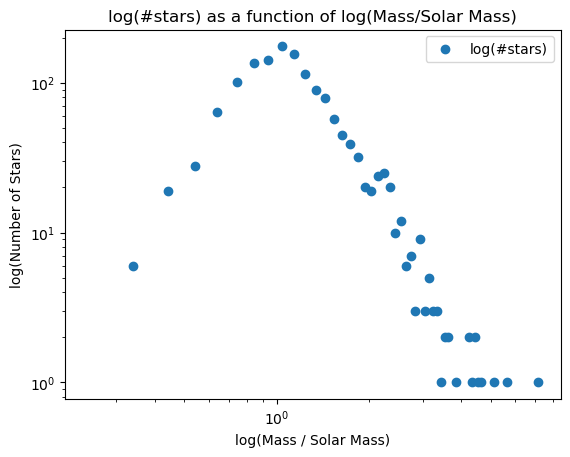

In [92]:
num = [  0., 6.,  19.,  28.,  64., 101., 136., 142., 175., 156., 114.,  90.,
         79.,  57.,  45.,  39.,  32.,  20.,  19.,  24.,  25.,  20.,  10.,
         12.,   6.,   7.,   3.,   9.,   3.,   5.,   3.,   3.,   1.,   2.,
          2.,   0.,   1.,   0.,   0.,   0.,   2.,   1.,   2.,   1.,   1.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.] # number of stars of each mass as calcultaed above

plt.scatter(buckets, num, label='log(#stars)') # plots the number of stars as a function of mass/solar mass on a log log scale.
plt.xscale('log') # sets x axis to log scale
plt.yscale('log') # sets y axis to log scale
plt.xlabel('log(Mass / Solar Mass)')        # x-axis label  
plt.ylabel('log(Number of Stars)')          # y-axis label  
plt.title('log(#stars) as a function of log(Mass/Solar Mass)') # Image title
plt.legend()

We note that it is very difficult to measure the stars with masses less than 1 solar mass due to their low photometry, which results in the drop we observe in stars below 1 solar mass. Therefore when fitting our initial mass function we only consider the data greater than  1 solar mass and with non zero numbers of stars.

In [93]:
# redefines the buckets and numbers to only incluse those with non zero values above 1 solar mass.

rbuckets = []
rnum = []
for i in range(len(num)):
    if buckets[i]>1 and num[i]>1:
        rbuckets.append(buckets[i])
        rnum.append(num[i])

Power law: y = a*x**(b) + c
a = 212.16603150183076 , b = -2.759530262336248 , c = -4.95394869239412
y = 212.16603150183076 *x^( -2.759530262336248 ) + ( -4.95394869239412 )


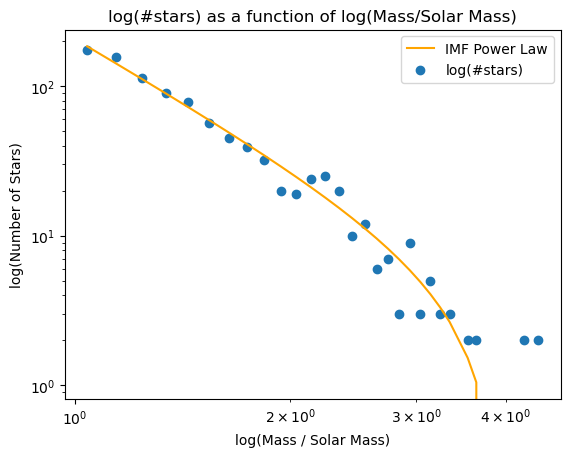

In [95]:
def power_law(x, a, b, c):
    return a*np.power(x, b) + c

popt, pcov = curve_fit(power_law, rbuckets, rnum)

# print(power_law(rbuckets, *popt))

print('Power law: y = a*x**(b) + c')
print('a =', popt[0], ', b =', popt[1], ', c =', popt[2])
print('y =', popt[0], '*x^(', popt[1], ') + (', popt[2], ')')


plt.plot(rbuckets, power_law(rbuckets, *popt), color='orange', label='IMF Power Law') # plots the power law line of best fit
plt.scatter(rbuckets, rnum, label='log(#stars)')                # plots the mass/#stars data
plt.xscale('log') # sets x axis to log scale
plt.yscale('log') # sets y axis to log scale
plt.xlabel('log(Mass / Solar Mass)')        # x-axis label            
plt.ylabel('log(Number of Stars)')          # y-axis label  
plt.title('log(#stars) as a function of log(Mass/Solar Mass)') # Image title
plt.legend()

The line defines a power law of #stars = ${212} \times {M} ^{-2.76} – {4.95}$, giving an approximate #stars $\alpha {M}^{-2.76}$ relation. There is no known IMF for NGC 3114, however we can argue that this is a very reasonable value, as it is well within the range of standard IMF laws with slopes 0f  -2.35.